In [7]:
import os,glob
import math
import imageio
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from utils import get_colorcode16_list, get_dict
from utils import get_u32_from_u16_list,get_level_id_list
from utils import get_region_name_list
from utils import get_region_u32id_list
from utils import load_json,write_json
from utils import color_map
from scipy import stats
from PIL import Image

from file_io import load_image



In [8]:
import sys
sys.path

['f:\\platform-paper\\fig2modules_figs3neurites_1224\\src',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\python38.zip',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\DLLs',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\lib',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose',
 '',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\lib\\site-packages',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\lib\\site-packages\\win32',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\lib\\site-packages\\win32\\lib',
 'c:\\Users\\user\\anaconda3\\envs\\cellpose\\lib\\site-packages\\Pythonwin']

# get soma info

In [9]:
soma_info_file = r'..\..\assets\TableS3_Soma_morphometry_1213.xlsx'
df_soma = pd.read_excel(soma_info_file)
df_soma_ = df_soma[df_soma['Registered  CCF Region']==df_soma['Registered  CCF Region']]
df_soma_ = df_soma_[df_soma_['Registered  CCF Region']!='nan']

n671_u32_id_list = get_region_u32id_list(df_soma_['Registered  CCF Region'])
df_soma_['n671_u32_id'] = n671_u32_id_list
df_soma_['n671_u32_id'] = df_soma_['n671_u32_id'].apply(int)
n316_u32_id_list = get_level_id_list(n671_u32_id_list,316)
df_soma_['n316_u32_id'] = n316_u32_id_list
df_soma_['n316_u32_id'] = df_soma_['n316_u32_id'].apply(str)
df_soma_

,Soma ID,fMOST BrainID,"Soma_X(Raw brain, in voxel)","Soma_Y(Raw brain, in voxel)","Soma_Z(Raw brain, in voxel)",Soma_X(CCFv3_1ùúáùëö),Soma_Y(CCFv3_1ùúáùëö),Soma_Z(CCFv3_1ùúáùëö),Production platform,Registered CCF Region,Local Traced,SEU-D15K,n671_u32_id,n316_u32_id
0,1,191797,9488.258,12907.284,1325.821,1046.975,3806.250,4448.350,Hi5,MOB,0,0,507,507
1,2,191797,9520.883,12816.454,1345.435,1072.625,3822.900,4408.225,Hi5,MOB,0,0,507,507
2,3,191797,9465.358,12822.361,1350.614,1080.225,3792.100,4412.875,Hi5,MOB,0,0,507,507
3,4,191797,9446.882,12839.179,1498.692,1273.500,3788.125,4426.550,Hi5,MOB,0,0,507,507
4,5,191797,9590.042,12979.944,1412.951,1158.075,3868.975,4479.775,Hi5,MOB,0,0,507,507
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227787,227788,191812,6996.992,8322.816,3488.080,3985.480,2573.000,2602.980,Vaa3D-TeraFly,MOp,0,0,985,985
227788,227789,18453,31782.080,8891.584,4742.160,6541.900,2256.980,9690.200,Vaa3D-TeraFly,SSp-bfd,0,0,329,329
227789,227790,17786,20216.729,20652.176,1706.997,2080.120,5050.900,6820.920,Vaa3D-TeraFly,AON,0,0,159,159
227790,227791,182725,5525.056,11629.376,5090.240,6068.200,965.900,4710.880,Vaa3D-TeraFly,MOp,0,0,985,985


In [10]:
df_somanums_onbrains = pd.pivot_table(df_soma_,index='fMOST BrainID',
                                                values='n316_u32_id',aggfunc='count')
df_somanums_onbrains.columns=['#somas']
df_somanums_onbrains.index = [str(i) for i in df_somanums_onbrains.index]
df_somanums_onbrains

,#somas
15257,4496
17051,276
17052,233
17109,847
17298,6374
...,...
201604,2
201605,6
201606,52
211541,324


In [11]:
df_somanums_onregions = pd.pivot_table(df_soma_,index='n316_u32_id',
                                       values='Registered  CCF Region',aggfunc='count')
df_somanums_onregions.columns=['#somas']
df_somanums_onregions.index = [str(i) for i in df_somanums_onregions.index]
df_somanums_onregions

,#somas
1,67
100,33
1002,771
1004,56
1007,4985
...,...
980,9
985,2550
989,56
993,1997


# get brain info

In [12]:
brain_info_file = r'..\..\assets\TableS1_SEU-ALLEN_brains_1223_204brains_yx.xlsx'
brain_info_csv = pd.read_excel(brain_info_file)
brain_info_csv['Transgenic Line (reporter; driver)'] = brain_info_csv['Transgenic Line (reporter; driver)'].apply(str)
brain_info_csv['reporter'] = brain_info_csv['reporter'].apply(str)
brain_info_csv['gene'] = brain_info_csv['gene'].apply(str)
brain_info_csv['driver'] = brain_info_csv['driver'].apply(str)
print(brain_info_csv.columns)
print(len(np.unique(brain_info_csv['Transgenic Line (reporter; driver)'])),np.unique(brain_info_csv['Transgenic Line (reporter; driver)']))
print(len(np.unique(brain_info_csv['reporter'])),np.unique(brain_info_csv['reporter']))
print(len(np.unique(brain_info_csv['gene'])),np.unique(brain_info_csv['gene']))
print(len(np.unique(brain_info_csv['driver'])),np.unique(brain_info_csv['driver']))
brain_info_csv

Index(['Animal ID', 'Image ID', 'Technique', 'Research lab',
       'Resolution_XY (𝜇𝑚/voxel)', 'Resolution_Z (𝜇𝑚/voxel)',
       'Dimension_X (voxel)', 'Dimension_Y (voxel)', 'Dimension_Z (voxel)',
       'size', 'size_scale', 'Brain_X (voxel)', 'Brain_Y (voxel)',
       'Brain_Z (voxel)', 'rawsize', 'regi_scale',
       'Transgenic Line (reporter; driver)', 'reporter', 'gene', 'driver',
       'Source', 'Main neuronal types targeted', 'Reference of target neurons',
       'Public downloadable link', 'BIL_path (whole brain)', 'Registered',
       'Has auto-detected neurite', '#soma identified', '#SEU-D15K',
       '#full-morphology', 'Has reference channel'],
      dtype='object')
49 ['Calb2-CreERT2;Ai166' 'Calb2-IRES-Cre' 'Chat-IRES-Cre'
 'Chat-IRES-Cre-neo' 'Chat-IRES-Cre-neo;Ai166' 'Chat-IRES-Cre;Ai166'
 'Chrna2-Cre_OE25+Sst-IRES-FlpO;Ai188-hyg' 'Chrna2-Cre_OE25;Ai166'
 'Ctgf-T2A-dgCre' 'Ctxn3-IRES2-FlpO' 'Cux2-CreERT2;Ai166'
 'Dbh-Cre_KH212;Ai166' 'Esr2-IRES2-Cre;Ai166'
 'Etv1-Cre

,Animal ID,Image ID,Technique,Research lab,Resolution_XY (𝜇𝑚/voxel),Resolution_Z (𝜇𝑚/voxel),Dimension_X (voxel),Dimension_Y (voxel),Dimension_Z (voxel),size,...,Main neuronal types targeted,Reference of target neurons,Public downloadable link,BIL_path (whole brain),Registered,Has auto-detected neurite,#soma identified,#SEU-D15K,#full-morphology,Has reference channel
0,453450.0,192333,fMOST,U19 Zeng,0.35,1.0,23886,30801,11025,8111232363150,...,calretinin interneurons,https://www.jax.org/strain/013730,https://download.brainimagelibrary.org/2f/12/2...,/bil/data/2f/12/2f12b1a3901e4181/mouseID_45345...,True,True,343,7,0,1
1,453452.0,192334,fMOST,U19 Zeng,0.35,1.0,23886,30801,11025,8111232363150,...,calretinin interneurons,https://www.jax.org/strain/013730,https://download.brainimagelibrary.org/2f/12/2...,/bil/data/2f/12/2f12b1a3901e4181/mouseID_45345...,True,True,361,63,0,1
2,454924.0,192335,fMOST,U19 Zeng,0.35,1.0,19868,29401,11299,6600187329332,...,calretinin interneurons,https://www.jax.org/strain/013730,https://download.brainimagelibrary.org/2f/12/2...,/bil/data/2f/12/2f12b1a3901e4181/mouseID_45492...,True,True,0,0,0,1
3,463964.0,194060,fMOST,U19 Zeng,0.35,1.0,25276,39201,11450,11345169250200,...,calretinin interneurons,https://www.jax.org/strain/013730,https://download.brainimagelibrary.org/2f/12/2...,/bil/data/2f/12/2f12b1a3901e4181/mouseID_46396...,True,True,306,81,0,1
4,463967.0,194061,fMOST,U19 Zeng,0.35,1.0,25276,39201,11450,11345169250200,...,calretinin interneurons,https://www.jax.org/strain/013730,https://download.brainimagelibrary.org/2f/12/2...,/bil/data/2f/12/2f12b1a3901e4181/mouseID_46396...,True,True,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,NaN,190718,STPT,U19 Huang,1.00,50.0,11377,8557,259,25214424151,...,NaN,NaN,https://download.brainimagelibrary.org/aa/72/a...,/bil/data/aa/72/aa72f327d8d79899/home/,True,False,0,0,0,0
200,NaN,190720,STPT,U19 Huang,1.00,50.0,11377,8557,260,25311777140,...,NaN,NaN,https://download.brainimagelibrary.org/ec/f1/e...,/bil/data/ec/f1/ecf14f82960392ed/home/,True,False,0,0,0,0
201,NaN,190805,STPT,U19 Huang,1.00,50.0,11377,8557,260,25311777140,...,NaN,NaN,https://download.brainimagelibrary.org/06/ea/0...,/bil/data/06/ea/06ea02c3bf50c7b9/190805_JH_HK0...,True,False,0,0,0,0
202,NaN,190823,STPT,U19 Huang,1.00,50.0,11377,8557,260,25311777140,...,NaN,NaN,https://download.brainimagelibrary.org/5f/97/5...,/bil/data/5f/97/5f97820484265501/190823_JH_HK0...,True,False,0,0,0,0


# get neurites info

In [13]:
signal_dir = '../PCAdetector'
allow0 = False
df_neurites = pd.DataFrame([])
for i,row in brain_info_csv[['Image ID','Technique','Research lab','gene','size_scale','regi_scale']].iterrows():
    brain,modality,source,gene,brainal_scale,regional_scale = row

    brain_path = f'{signal_dir}/*/{brain}.csv'
    try:
        brain_path = glob.glob(brain_path)[0]
        print(f'{brain_path} appended')
    except:
        print(brain_path)
        raise
    
    df_brain = pd.read_csv(brain_path,header=0,usecols=[0,1],names=['n671_u16_id','count']) 
    if len(df_brain):
        df_brain['n671_u16_id'] = df_brain['n671_u16_id'].apply(int)
        df_brain['count'] = df_brain['count'].apply(int)
        df_brain['brainal_scalecount'] = (df_brain['count']*brainal_scale).apply(math.ceil)
        df_brain['regional_scalecount'] = (df_brain['count']*regional_scale).apply(math.ceil)     
        df_brain['brain'] = str(brain)
        df_brain['modality'] = modality
        df_brain['source'] = source
        df_brain['gene'] = gene 
        if not allow0:
            df_brain = df_brain[df_brain['n671_u16_id']!=0] 
        df_neurites = pd.concat([df_neurites,df_brain])

df_neurites.reset_index(inplace=True,drop=True)
print(df_neurites.columns)
print(len(np.unique(df_neurites['brain'])),np.unique(df_neurites['brain']))
print(len(np.unique(df_neurites['n671_u16_id'])),np.unique(df_neurites['n671_u16_id']))

df_neurites


../PCAdetector\fMOST-U19 Zeng\192333.csv appended
../PCAdetector\fMOST-U19 Zeng\192334.csv appended
../PCAdetector\fMOST-U19 Zeng\192335.csv appended
../PCAdetector\fMOST-U19 Zeng\194060.csv appended
../PCAdetector\fMOST-U19 Zeng\194061.csv appended
../PCAdetector\fMOST-U19 Zeng\194062.csv appended
../PCAdetector\fMOST-U19 Zeng\194063.csv appended
../PCAdetector\fMOST-U19 Zeng\194064.csv appended
../PCAdetector\fMOST-U19 Zeng\196468.csv appended
../PCAdetector\fMOST-U19 Zeng\196469.csv appended
../PCAdetector\fMOST-U19 Zeng\201587.csv appended
../PCAdetector\fMOST-U19 Zeng\201588.csv appended
../PCAdetector\fMOST-U19 Zeng\201589.csv appended
../PCAdetector\fMOST-U19 Zeng\201590.csv appended
../PCAdetector\fMOST-U19 Zeng\201595.csv appended
../PCAdetector\fMOST-U19 Zeng\201596.csv appended
../PCAdetector\fMOST-U19 Zeng\201598.csv appended
../PCAdetector\fMOST-U19 Zeng\211775.csv appended
../PCAdetector\fMOST-U19 Zeng\211776.csv appended
../PCAdetector\fMOST-U19 Zeng\211777.csv appended


,n671_u16_id,count,brainal_scalecount,regional_scalecount,brain,modality,source,gene
0,275,7081,1051,1051,192333,fMOST,U19 Zeng,Calb2
1,277,3148,468,468,192333,fMOST,U19 Zeng,Calb2
2,303,1685,251,251,192333,fMOST,U19 Zeng,Calb2
3,305,2371,352,352,192333,fMOST,U19 Zeng,Calb2
4,309,1644,244,244,192333,fMOST,U19 Zeng,Calb2
...,...,...,...,...,...,...,...,...
181451,370,3,16,16,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan
181452,2246,7,38,38,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan
181453,1639,88,468,468,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan
181454,1844,11,59,59,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan


In [14]:
#get level316_brain191_density info
level = 671
uint = 16
n671_u16_voxel_dict = get_dict(level,uint,key='voxel')
voxel_list = [(n671_u16_voxel_dict[i] if i in n671_u16_voxel_dict.keys() else float('inf')) for i in df_neurites['n671_u16_id']]
df_neurites['density'] = df_neurites['regional_scalecount']/voxel_list # note 1 um pixel on 25 um volume, should (voxel*25) 
df_neurites['density'] = df_neurites['density']/(0.025*0.025*0.025) #note mm-3
df_neurites['logdensity'] = np.log10(df_neurites['density']+1).round(2)

df_neurites.to_csv('../middle_files/1342neurite_info.csv',index=False)
df_neurites

,n671_u16_id,count,brainal_scalecount,regional_scalecount,brain,modality,source,gene,density,logdensity
0,275,7081,1051,1051,192333,fMOST,U19 Zeng,Calb2,5536.131687,3.74
1,277,3148,468,468,192333,fMOST,U19 Zeng,Calb2,1986.206897,3.30
2,303,1685,251,251,192333,fMOST,U19 Zeng,Calb2,1720.098512,3.24
3,305,2371,352,352,192333,fMOST,U19 Zeng,Calb2,1811.223669,3.26
4,309,1644,244,244,192333,fMOST,U19 Zeng,Calb2,807.362217,2.91
...,...,...,...,...,...,...,...,...,...,...
181451,370,3,16,16,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan,841.413311,2.93
181452,2246,7,38,38,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan,10761.061947,4.03
181453,1639,88,468,468,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan,97246.753247,4.99
181454,1844,11,59,59,AZ10_SR3B_6_A_647,LSFM,U01 Wu,nan,8372.505543,3.92


# get neurites info of gened brains

In [15]:
df_neurites_gene = df_neurites[df_neurites['gene']==df_neurites['gene']]
df_neurites_gene = df_neurites_gene[df_neurites_gene['gene']!='nan']

df_neurites_gene.reset_index(inplace=True,drop=True)
print(len(np.unique(df_neurites_gene['brain'])),np.unique(df_neurites_gene['brain']))
print(len(np.unique(df_neurites_gene['modality'])),np.unique(df_neurites_gene['modality']))
print(len(np.unique(df_neurites_gene['source'])),np.unique(df_neurites_gene['source']))
print(len(np.unique(df_neurites_gene['gene'])),np.unique(df_neurites_gene['gene']))
print(df_neurites_gene.columns)

df_neurites_gene.to_csv('../middle_files/1342neurites_info_genebrains.csv',index=False)
df_neurites_gene

183 ['15257' '16124' '17051' '17052' '17109' '17298' '17300' '17301' '17302'
 '17304' '17539' '17541' '17542' '17543' '17544' '17545' '17781' '17782'
 '17783' '17785' '17786' '17787' '17788' '18047' '18049' '18052' '18053'
 '182712' '182720' '182721' '182722' '182724' '182725' '182726' '182727'
 '18452' '18453' '18454' '18455' '18457' '18458' '18459' '18461' '18462'
 '18463' '18464' '18465' '18466' '18467' '18468' '18469' '18470' '18471'
 '18472' '18860' '18861' '18862' '18864' '18865' '18866' '18867' '18868'
 '18869' '18872' '190891' '190892' '190900' '190902' '191196' '191797'
 '191798' '191799' '191801' '191803' '191804' '191807' '191808' '191809'
 '191810' '191811' '191812' '191813' '191815' '191817' '192333' '192334'
 '192335' '192337' '192338' '192339' '192340' '192341' '192342' '192343'
 '192346' '192348' '192349' '193374' '193381' '193385' '193386' '193387'
 '194060' '194061' '194062' '194063' '194064' '194065' '194066' '194067'
 '194068' '194069' '194071' '194072' '194073' '19

,n671_u16_id,count,brainal_scalecount,regional_scalecount,brain,modality,source,gene,density,logdensity
0,275,7081,1051,1051,192333,fMOST,U19 Zeng,Calb2,5536.131687,3.74
1,277,3148,468,468,192333,fMOST,U19 Zeng,Calb2,1986.206897,3.30
2,303,1685,251,251,192333,fMOST,U19 Zeng,Calb2,1720.098512,3.24
3,305,2371,352,352,192333,fMOST,U19 Zeng,Calb2,1811.223669,3.26
4,309,1644,244,244,192333,fMOST,U19 Zeng,Calb2,807.362217,2.91
...,...,...,...,...,...,...,...,...,...,...
175160,1754,1903,213,213,196466,fMOST,U19 Zeng,Vipr2,23223.168654,4.37
175161,1740,3,1,1,196466,fMOST,U19 Zeng,Vipr2,22.582922,1.37
175162,1650,43,5,5,196466,fMOST,U19 Zeng,Vipr2,449.438202,2.65
175163,1302,4,1,1,196466,fMOST,U19 Zeng,Vipr2,9.315866,1.01


# plot figs3b: whole-brain neurites of gened brains

In [16]:
_0 = pd.pivot_table(df_neurites_gene,index=['gene','brain'],values='count',aggfunc='sum').sort_values(by='count')
_1 = pd.pivot_table(df_neurites_gene,index=['brain'],values='count',aggfunc='sum').sort_values(by='count')
_2 = pd.pivot_table(df_neurites_gene,index=['gene'],values='count',aggfunc='sum').sort_values(by='count')
values = []
nbs= []
for i,gene in enumerate(_2.index):
    ib = 0
    for brain in _1.index:
        if (gene,brain) in _0.index:
            ib+=1
            values.append([gene,brain,_1.loc[brain,'count']])
    nbs.append(ib)
                      
df_genebrain_neurites = pd.DataFrame(values,columns=['gene','brain','neurites'])
df_genebrain_neurites['gene'] = df_genebrain_neurites['gene'].apply(str)
df_genebrain_neurites['brain'] = df_genebrain_neurites['brain'].apply(str)
df_genebrain_neurites['neurites'] = df_genebrain_neurites['neurites'].apply(int)
print(df_genebrain_neurites['neurites'].max(),df_genebrain_neurites['neurites'].min())

height = 15
width = 5
plt.figure(figsize=(width,height))
sns.set_style("whitegrid")
sns.scatterplot(data=df_genebrain_neurites, x='neurites', y='gene', c='m', s=60)
plt.xscale('log')
plt.xticks(fontsize=20)
plt.xlabel('#neurite voxels', fontsize=20, weight='bold')
plt.yticks(fontsize=20,)
plt.ylabel('genes', fontsize=20, weight='bold')
# plt.ylim([34+1+0.2,1-0.2])
plt.xlim([10**2,10**10])
plt.tight_layout()    
plt.savefig('./gened_brain_neurites.png', dpi=400)
plt.close('all') 

df_genebrain_neurites.to_csv('../middle_files/genebrain_neuritesum.csv')
df_genebrain_neurites

1357654676 158


,gene,brain,neurites
0,Ctxn3,211549,165419
1,Ctgf,211791,273329
2,Gal,211544,288077
3,Fezf2+LSL,193385,16127
4,Fezf2+LSL,193381,34286
...,...,...,...
178,Calb2,201587,82874066
179,Calb2,201590,85851398
180,Calb2,192334,95307132
181,Calb2,201595,206825906


In [111]:
for i in nbs[15:]:
    print(i)

1
1
12
2
5
1
7
2
1
3
16
8
7
9
3
11
2
3
22


# plot fig3b: regional density contourplot on gened brains

In [17]:
def detect_edges2d(img2d):
    img = img2d.astype(float)
    gx, gy = np.gradient(img)
    edges = (gx*gx + gy*gy) != 0
    return edges

def get_brain_outline2d(mask, axis=0, v=255):
    mask = mask > 0
    mask2d = mask.max(axis=axis)
    outline = detect_edges2d(mask2d)
    return outline.astype(np.uint8) * v

def get_section_boundary(array,axis=1,v=255,withoutline=False):
    if len(array.shape)==3:
        if axis==0:
            section = eval(f'array[{int(array.shape[axis]/2)},:,:]')
        elif axis==1:
            section = eval(f'array[:,{int(array.shape[axis]/2)},:]')
        else:
            section = eval(f'array[:,:,{int(array.shape[axis]/2)}]')
        boundary = detect_edges2d(section)
        if withoutline:
            outline = get_brain_outline2d(array, axis=axis, v=v)    
            return np.maximum(boundary.astype(np.uint8) * v  , outline)
    else:
        boundary = detect_edges2d(array)
    return boundary.astype(np.uint8) * v  

def rotate3d(img3d):
    img = np.zeros((img3d.shape[1],img3d.shape[0],img3d.shape[2]))
    for i in range(img3d.shape[2]):
        img[:,:,i] = img3d[:,:,i].T
    img = img.astype(np.uint8)
    return img

def rotate2d(img2d,rot=90):
    k = int(rot/90)
    img = np.rot90(img2d,k)
    return img

def get_section_array(imagefile,axis=None,rot=0):
    if imagefile.endswith('nrrd'): image = load_image(imagefile)
    else: image = load_image(imagefile)[0]
    if axis==None:
        axis = image.shape.index(min(image.shape))
        if axis==0:
            section = eval(f'image[{int(image.shape[axis]/2)},:,:]')
        elif axis==1:
            section = eval(f'image[:,{int(image.shape[axis]/2)},:]')
        else:
            section = eval(f'image[:,:,{int(image.shape[axis]/2)}]')
#     imageio.imsave('test.png',section)
    if rot:
        return rotate2d(section,rot),axis
    else:
        return section,axis

md = df_neurites_gene['logdensity'].max()
nc = 20
df_neurites_gene['ncolor'] = (nc*df_neurites_gene['logdensity']/md).astype(int)
df_neurites_gene['colorcode'] = get_colorcode16_list(df_neurites_gene['ncolor'],nc=nc,cmap='spring',reverse=True)
 
df_neurites_gene

,n671_u16_id,count,brainal_scalecount,regional_scalecount,brain,modality,source,gene,density,logdensity,ncolor,colorcode
0,275,7081,1051,1051,192333,fMOST,U19 Zeng,Calb2,5536.131687,3.74,11,FF748B
1,277,3148,468,468,192333,fMOST,U19 Zeng,Calb2,1986.206897,3.30,10,FF807F
2,303,1685,251,251,192333,fMOST,U19 Zeng,Calb2,1720.098512,3.24,10,FF807F
3,305,2371,352,352,192333,fMOST,U19 Zeng,Calb2,1811.223669,3.26,10,FF807F
4,309,1644,244,244,192333,fMOST,U19 Zeng,Calb2,807.362217,2.91,9,FF8B74
...,...,...,...,...,...,...,...,...,...,...,...,...
175160,1754,1903,213,213,196466,fMOST,U19 Zeng,Vipr2,23223.168654,4.37,13,FF5DA2
175161,1740,3,1,1,196466,fMOST,U19 Zeng,Vipr2,22.582922,1.37,4,FFC539
175162,1650,43,5,5,196466,fMOST,U19 Zeng,Vipr2,449.438202,2.65,8,FF9768
175163,1302,4,1,1,196466,fMOST,U19 Zeng,Vipr2,9.315866,1.01,3,FFD12E


In [18]:
annofile = f'../../assets/n671_u16.nrrd'
an,_ = get_section_array(annofile,None,180) 
boundary = get_section_boundary(an)
bindices = np.nonzero(boundary)

figfile = './regional_density.png'
width = max(nbs)
height = len(_2.index)
fig = plt.figure(figsize=(width,height))    
ih = 0
for i,gene in enumerate(_2.index):
    # ib = 0
    # for brain in _1.index:
    #     if (gene,brain) in _0.index:
            
    #         fig.add_subplot(height,width,ih*width+ib+1)
    #         anno = an.copy()
    #         df_brain = df_neurites_gene[df_neurites_gene['brain']==brain]      
    #         for region,color in zip(df_brain['n671_u16_id'],df_brain['colorcode']):
    #             mask = anno==region
    #             indices = np.nonzero(mask)
    #             plt.scatter(indices[0], indices[1], s=0.5, c='#'+color, alpha=1.0, edgecolors='none')
    #         print(f'{gene} {brain} color mapping done')
    #         plt.scatter(bindices[0], bindices[1], s=0.1, c='black', alpha=1.0, edgecolors='none')
    #         print(f'{gene} {brain} boundary plotting done')
    #         plt.axis('off')
    #         ib += 1
    ih += 1

# plt.subplots_adjust(left=0.001,right=1-0.001,bottom=0.001,top=1-0.001)
# plt.savefig(figfile,dpi=400)
plt.close()  

# get brain-314region neurites density pair 

In [19]:
# df_neurites
n671_u32_id_list = get_u32_from_u16_list(df_neurites['n671_u16_id'].tolist())
df_neurites['n671_u32_id'] = n671_u32_id_list
df_neurites['n671_u32_id'] = df_neurites['n671_u32_id'].apply(int)

level = 316
n316_u32_id_list = get_level_id_list(n671_u32_id_list,level)
df_neurites['n316_u32_id'] = n316_u32_id_list
df_neurites['n316_u32_id'] = df_neurites['n316_u32_id'].apply(int)

df_neurites_ = df_neurites.drop(np.nonzero(df_neurites['n316_u32_id'].values==0)[0].tolist(),axis=0)

df_neurites_gene_ = df_neurites_[df_neurites_['gene']==df_neurites_['gene']]
df_neurites_gene_ = df_neurites_gene_[df_neurites_gene_['gene']!='nan']
df_neurites_gene_

,n671_u16_id,count,brainal_scalecount,regional_scalecount,brain,modality,source,gene,density,logdensity,n671_u32_id,n316_u32_id
0,275,7081,1051,1051,192333,fMOST,U19 Zeng,Calb2,5536.131687,3.74,735,1002
1,277,3148,468,468,192333,fMOST,U19 Zeng,Calb2,1986.206897,3.30,251,1002
2,303,1685,251,251,192333,fMOST,U19 Zeng,Calb2,1720.098512,3.24,959,1018
3,305,2371,352,352,192333,fMOST,U19 Zeng,Calb2,1811.223669,3.26,755,1018
4,309,1644,244,244,192333,fMOST,U19 Zeng,Calb2,807.362217,2.91,1023,1018
...,...,...,...,...,...,...,...,...,...,...,...,...
175160,1754,1903,213,213,196466,fMOST,U19 Zeng,Vipr2,23223.168654,4.37,607344854,100
175161,1740,3,1,1,196466,fMOST,U19 Zeng,Vipr2,22.582922,1.37,12,12
175162,1650,43,5,5,196466,fMOST,U19 Zeng,Vipr2,449.438202,2.65,607344830,607344830
175163,1302,4,1,1,196466,fMOST,U19 Zeng,Vipr2,9.315866,1.01,741,741


In [20]:
df_191brain_316region_neurites = pd.pivot_table(df_neurites_,index='brain',columns='n316_u32_id',
                                                values='regional_scalecount',aggfunc='sum',fill_value=0)
level = 316
uint = 32
n316_u32_voxel_dict = get_dict(level,uint,key='voxel')
voxel_list = [[n316_u32_voxel_dict[int(i)] if int(i) in n316_u32_voxel_dict else float('inf')][0] for i in df_191brain_316region_neurites.columns]

df_191brain_316region_density = pd.DataFrame(df_191brain_316region_neurites.values/voxel_list/(0.025*0.025*0.025),
                         columns=df_191brain_316region_neurites.columns,
                         index=df_191brain_316region_neurites.index)
df_191brain_316region_density.columns = df_191brain_316region_density.columns.astype(int)
df_191brain_316region_density

n316_u32_id,1,4,7,12,15,19,23,27,30,35,...,563807439,576073699,576073704,589508447,589508451,589508455,599626923,599626927,606826663,607344830
brain,,,,,,,,,,,,,,,,,,,,,
15257,103650.266917,2542.000907,7839.037638,6262.996942,2724.330205,14122.141242,17114.116012,260.928652,4492.635537,737.044146,...,2872.928177,11803.115265,28312.354312,642.513151,15807.405150,1.009723e+03,990.055249,271.717831,62.439024,9.285917e+03
16124,572.500361,765.928440,645.214498,2659.471128,295.933633,1528.022116,798.685707,1927.972820,2045.753682,214.971209,...,1325.966851,478.504673,363.636364,879.602875,253.542587,8.218675e+01,212.154696,1107.772698,2997.073171,2.731152e+02
17051,0.000000,0.899505,0.000000,69.077172,0.000000,0.000000,12.131935,0.000000,80.225635,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.751638,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
17052,0.000000,2182.423814,713.467089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.751638,5.040396e+04,0.000000,83.605487,0.000000,0.000000e+00
17109,2169.961045,10883.110038,17325.237818,3741.680158,2985.448116,6015.581804,5198.534058,6044.847112,2787.840802,8261.036468,...,4198.895028,3110.280374,1757.575758,11901.904127,4524.760018,5.353880e+03,353.591160,4619.203135,5432.195122,1.247226e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211806,9.233877,41.826979,185.647049,103.615758,21.759826,0.000000,38.417794,0.000000,40.112817,0.000000,...,0.000000,119.626168,363.636364,7.112692,19.503276,2.348193e+01,0.000000,146.309602,0.000000,0.000000e+00
211807,101.572645,15.291584,223.868500,11.512862,60.927513,0.000000,218.374826,0.000000,621.748668,0.000000,...,132.596685,558.255452,1379.953380,7.112692,1170.196556,0.000000e+00,70.718232,20.901372,374.634146,4.551920e+01
A3_16um_final,1385.081518,2427.763782,372.204132,11466.810577,74140.078879,28083.438050,1641.855175,188.448471,65363.835788,20606.525912,...,972.375691,1495.327103,143776.223776,1318.218863,185.281121,3.498808e+03,565.745856,438.928805,187.317073,4.551920e+01


In [21]:
df_183brain_316region_neurites = pd.pivot_table(df_neurites_gene_,index='brain',columns='n316_u32_id',
                                                values='regional_scalecount',aggfunc='sum',fill_value=0)


df_183brain_316region_density = pd.DataFrame(df_183brain_316region_neurites.values/voxel_list/(0.025*0.025*0.025),
                         columns=df_183brain_316region_neurites.columns,
                         index=df_183brain_316region_neurites.index)
df_183brain_316region_density.columns = df_183brain_316region_density.columns.astype(int)
df_183brain_316region_density

n316_u32_id,1,4,7,12,15,19,23,27,30,35,...,563807439,576073699,576073704,589508447,589508451,589508455,599626923,599626927,606826663,607344830
brain,,,,,,,,,,,,,,,,,,,,,
15257,103650.266917,2542.000907,7839.037638,6262.996942,2724.330205,14122.141242,17114.116012,260.928652,4492.635537,737.044146,...,2872.928177,11803.115265,28312.354312,642.513151,15807.405150,1009.722987,990.055249,271.717831,62.439024,9285.917496
16124,572.500361,765.928440,645.214498,2659.471128,295.933633,1528.022116,798.685707,1927.972820,2045.753682,214.971209,...,1325.966851,478.504673,363.636364,879.602875,253.542587,82.186755,212.154696,1107.772698,2997.073171,273.115220
17051,0.000000,0.899505,0.000000,69.077172,0.000000,0.000000,12.131935,0.000000,80.225635,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.751638,0.000000,0.000000,0.000000,0.000000,0.000000
17052,0.000000,2182.423814,713.467089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.751638,50403.962576,0.000000,83.605487,0.000000,0.000000
17109,2169.961045,10883.110038,17325.237818,3741.680158,2985.448116,6015.581804,5198.534058,6044.847112,2787.840802,8261.036468,...,4198.895028,3110.280374,1757.575758,11901.904127,4524.760018,5353.880022,353.591160,4619.203135,5432.195122,12472.261735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211803,507.863223,278.171897,162.896185,184.205792,147.966816,112.591103,179.957033,2623.782559,0.000000,0.000000,...,397.790055,1315.887850,573.426573,6240.201526,214.536035,11.740965,70.718232,0.000000,0.000000,0.000000
211804,3905.929880,891.409377,183.826980,80.590034,1000.951992,426.237748,742.070011,1739.524349,1103.102476,0.000000,...,9104.972376,3548.909657,941.724942,7494.406164,68.261466,857.090442,0.000000,20.901372,0.000000,136.557610
211805,193.911412,122.782422,12.740484,6193.919770,382.972936,144.759990,101.099457,956.738392,0.000000,30.710173,...,220.994475,418.691589,97.902098,1934.652145,770.379400,23.481930,0.000000,20.901372,0.000000,91.038407


# plot figs3b boxplot score

In [112]:
def extracted_scores(corr):
    if corr.shape[0]==1:
        return None,None
    triu = np.triu(np.ones(corr.shape),1)
    scores = corr.values[triu>0]
#     scores = scores[scores==scores]
    mean_score = np.nanmean(scores)
    return scores[scores==scores].tolist(),mean_score

# df_183brain_316region_density.to_csv('../middle_files/df_183brain_316region_density.csv')

# corr calced by R, with nan value

corr = pd.read_csv('..//middle_files//corr_183brain_316region_density.csv',header=None)
corr.columns = df_183brain_316region_density.index
corr.index = df_183brain_316region_density.index

iax = 0
fig = plt.figure(figsize=(3,30))
colorcode = get_colorcode16_list(list(range(13)),nc=12,cmap='spring',reverse=True)
for i,gene in enumerate(_2.index):
    extracted_cols = []
    for brain in _1.index:
        if (gene,brain) in _0.index:
            extracted_cols.append(brain)
    gene_corr = corr.loc[extracted_cols,extracted_cols]
    scores,mean_score = extracted_scores(gene_corr)
    print(gene,len(extracted_cols),scores,mean_score)
    
    try:
        if len(scores):
#         if !=None
        
            ax = fig.add_subplot(30,1,iax+1)
            sns.boxplot(scores,fliersize=5,width=0.3,linewidth=2,
                        color='#'+colorcode[int(round(mean_score*10)+2)],
                        orient='h',ax=ax)            
            ax.spines['top'].set_linewidth('1')
            ax.spines['left'].set_linewidth('1')
            ax.spines['right'].set_linewidth('1')
            ax.spines['bottom'].set_linewidth('1')
            ax.set_xlim([-0.4,1])
            ax.set_ylim([-0.3,0.3])
            ax.set_title(f'{gene}:{round(mean_score,2)}')
            iax += 1
    except:
        pass
    plt.subplots_adjust(left=0.2,right=0.8,wspace=1,hspace=2)
plt.savefig('./gene_score.png',dpi=500)

Ctxn3 1 None None
Ctgf 1 None None
Gal 1 None None
Fezf2+LSL 10 [0.683794466, 0.162055336, 0.101298701, 0.393280632, 0.238848108, 0.381818182, 2.71e-16, 0.633889377, 0.744143625, 0.556097561, 0.529970469, 0.665695574, 0.747585601, 0.524296675, 0.438332634, 0.663599558, 0.311740891, 0.64942349, 0.779628862, 0.841358465, 0.57703252, 0.307702121, 0.36913229, 0.523089542, 0.636733472, 0.626094039, 0.396413262, 0.198017173, -0.064905599, 0.185158371, 0.244118613, 0.47195122, 0.348686198, 0.631725417, 0.591418248, 0.53412853, 0.613177448, 0.875065748, 0.497501749, 0.404690531, 0.524921217, 0.463622557, 0.660456188] 0.48052997818604654
Gpr139 1 None None
Sst 5 [0.416609706, -0.025620389, 0.48321224, 0.437608911, 0.058297049, 0.374829001, 0.445489274, 0.185514412, 0.22983498, 0.828558285] 0.34343334690000005
Tle4 4 [0.378248489, 0.51622299, 0.401918413, 0.414700544, 0.407937057, 0.615133492] 0.4556934975
Plxnd1+PhiC31 3 [0.125513311, 0.360011324, 0.349917081] 0.27848057200000004
Pdyn+Sst 3 [0.

TypeError: must be real number, not str

Error in callback <function _draw_all_if_interactive at 0x00000265D3AFD9D0> (for post_execute):


TypeError: must be real number, not str

TypeError: must be real number, not str

<Figure size 300x3000 with 26 Axes>

# plot figs3c scatter

In [24]:
df_neuritenums_on191brains = pd.pivot_table(df_neurites_,index='brain',
                                                values='count',aggfunc='sum',fill_value=0)
df_neuritenums_on191brains.columns=['#neurite voxels']
df_neuritenums_on191brains.index = [str(i) for i in df_neuritenums_on191brains.index]
df_neuritenums_on191brains


,#neurite voxels
15257,12238159
16124,2718814
17051,25169
17052,24887933
17109,21271545
...,...
211806,277050
211807,443653
A3_16um_final,43968640
AVP-IHC-A2_16um,9879333


In [25]:
df_neuritenums_onregions = pd.pivot_table(df_neurites_,index='n316_u32_id',
                                                values='count',aggfunc='sum',fill_value=0)
df_neuritenums_onregions.columns=['#neurite voxels']
df_neuritenums_onregions.index = [str(i) for i in df_neuritenums_onregions.index]
df_neuritenums_onregions

,#neurite voxels
1,1090300
4,66265901
7,7904809
12,833372
15,2327936
...,...
589508455,4647431
599626923,47687
599626927,203511
606826663,73323


,#neurite voxels,#somas
18468,152,18
17051,25169,276
191804,31217,49
18461,39097,56
182721,40262,1
...,...,...
17539,351569347,499
18861,422464930,1842
18472,437280421,3022
18471,620810783,852


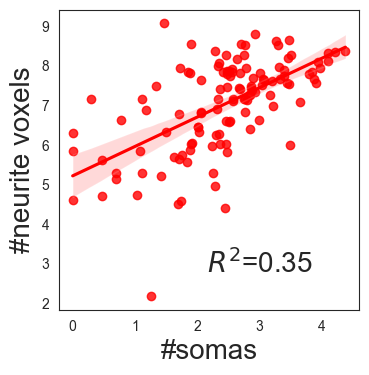

In [108]:
# df_signal_soma = pd.concat([df_neuritenums_on191brains,df_somanums_onbrains],axis=1).fillna(0)
# drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
# drop_index = df_signal_soma.index[drop]
# df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
# df_signal_soma = df_signal_soma.sort_values(by='#neurite voxels')
# df_signal_soma['#neurite voxels'] = df_signal_soma['#neurite voxels'].apply(int)
# df_signal_soma['#somas'] = df_signal_soma['#somas'].apply(int)

df_signal_soma = pd.read_csv('./signal_soma_brain.csv',index_col=0)
df_signal_soma.index = [str(i) for i in df_signal_soma.index]

_,_,r,_,_ = stats.linregress(np.log10(df_signal_soma['#somas']),np.log10(df_signal_soma['#neurite voxels']))

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

sns.regplot(x=np.log10(df_signal_soma['#somas']),y=np.log10(df_signal_soma['#neurite voxels']),color='red',ax=ax1)#label='#neurite voxel')sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(3,3,f'$R^2$={round(r**2,2)}',va='center',ha='center',fontsize=20)
plt.xlabel('#somas',fontsize=20)
plt.ylabel('#neurite voxels',fontsize=20)

plt.subplots_adjust(bottom=0.2,top=0.8,left=0.2,right=0.8)
plt.savefig('./neurite_soma_brain.png',dpi=300)

df_signal_soma

,#neurite voxels,#somas
549009219,41254,1
280,82989,2
147,85398,1
106,88054,4
653,116366,1
...,...,...
1007,449693359,4985
672,573898381,24588
928,582535482,7369
507,693134389,20468


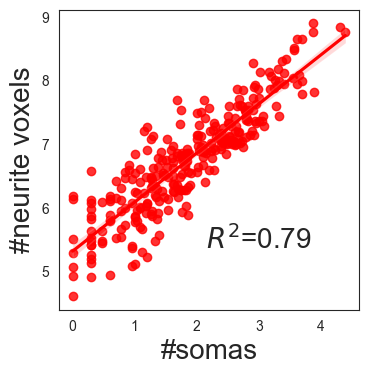

In [106]:
# df_signal_soma = pd.concat([df_neuritenums_onregions,df_somanums_onregions],axis=1).fillna(0)
# drop = np.nonzero(df_signal_soma.values==0)[0].tolist()
# drop_index = df_signal_soma.index[drop]
# df_signal_soma = df_signal_soma.drop(drop_index,axis=0)
# df_signal_soma = df_signal_soma.sort_values(by='#neurite voxels')
# df_signal_soma['#neurite voxels'] = df_signal_soma['#neurite voxels'].apply(int)
# df_signal_soma['#somas'] = df_signal_soma['#somas'].apply(int)

df_signal_soma = pd.read_csv('./signal_soma_region.csv',index_col=0)
df_signal_soma.index = [str(i) for i in df_signal_soma.index]

_,_,r,_,_ = stats.linregress(np.log10(df_signal_soma['#somas']),np.log10(df_signal_soma['#neurite voxels']))

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111)

sns.regplot(x=np.log10(df_signal_soma['#somas']),y=np.log10(df_signal_soma['#neurite voxels']),color='red',ax=ax1)#label='#neurite voxel')sns.regplot(x=np.log10(df_signal_soma['somata']),y=np.log10(df_signal_soma['signal']),color='red',ax=ax1)#label='#neurite voxel')
plt.text(3,5.5,f'$R^2$={round(r**2,2)}',va='center',ha='center',fontsize=20)
plt.xlabel('#somas',fontsize=20)
plt.ylabel('#neurite voxels',fontsize=20)

plt.subplots_adjust(bottom=0.2,top=0.8,left=0.2,right=0.8)
plt.savefig('./neurite_soma_region.png',dpi=300)
# plt.close()

df_signal_soma

# get standard brainal-regional pairwidth neurites

In [28]:
level = 13
structure_list = get_level_id_list(df_191brain_316region_density.columns.astype(int).tolist(),level)
write_json([int(i) for i in structure_list],'../middle_files/structure_list.json')
structure_list

[1097,
 313,
 771,
 313,
 549,
 1089,
 477,
 549,
 1097,
 313,
 1097,
 315,
 315,
 315,
 477,
 313,
 549,
 1097,
 549,
 313,
 1097,
 313,
 354,
 1097,
 519,
 354,
 313,
 354,
 315,
 354,
 315,
 313,
 1097,
 315,
 1097,
 549,
 313,
 703,
 1097,
 354,
 354,
 771,
 771,
 549,
 698,
 549,
 698,
 771,
 354,
 549,
 1097,
 354,
 549,
 549,
 315,
 549,
 549,
 1097,
 313,
 354,
 354,
 354,
 354,
 354,
 1097,
 313,
 313,
 354,
 549,
 354,
 1097,
 354,
 1097,
 354,
 313,
 354,
 771,
 313,
 477,
 549,
 477,
 549,
 1097,
 477,
 313,
 1097,
 771,
 1097,
 803,
 477,
 313,
 703,
 803,
 313,
 354,
 477,
 771,
 703,
 549,
 549,
 315,
 1097,
 477,
 315,
 1097,
 803,
 315,
 1097,
 771,
 803,
 315,
 1097,
 771,
 315,
 549,
 1097,
 549,
 315,
 354,
 313,
 315,
 313,
 1089,
 315,
 1097,
 315,
 771,
 315,
 477,
 315,
 549,
 315,
 549,
 1089,
 315,
 354,
 354,
 354,
 1097,
 313,
 1089,
 1097,
 549,
 549,
 1097,
 1089,
 698,
 1097,
 1097,
 1097,
 313,
 315,
 771,
 477,
 315,
 803,
 698,
 771,
 549,
 354,
 313,


In [29]:
w = []
for brain in df_191brain_316region_density.index:
    try:
        gene = [i[0] for i in _0.index if i[1]==brain][0]
        gene_brain_num = len([i[1] for i in _0.index if i[0]==gene])
    except:
        gene_brain_num = float('inf')
    print(gene_brain_num)
    w.append(1/gene_brain_num)
w = np.array(w)
w[w==0] = np.nan
s = np.nanmean(w)
w[w!=w] = s
w

11
5
7
11
5
5
16
4
7
3
16
5
5
3
3
7
5
5
1
1
3
16
3
12
4
9
3
inf
1
4
4
4
12
12
2
2
inf
12
12
7
7
8
8
4
12
7
7
8
8
4
1
12
12
12
2
2
9
9
9
12
2
2
11
11
11
3
10
10
10
10
10
3
3
3
12
12
4
12
7
3
3
3
16
16
5
5
22
22
22
7
7
7
7
7
16
16
3
3
3
10
10
10
10
10
22
22
22
22
22
12
12
12
12
12
12
12
16
16
16
16
16
16
16
11
11
4
8
8
8
8
22
22
9
9
9
9
4
4
4
5
11
11
11
11
22
22
22
22
9
6
6
22
22
22
6
7
9
9
9
inf
1
1
3
22
1
inf
22
22
22
22
12
12
12
12
16
16
1
inf
3
9
9
9
9
6
6
6
9
9
inf
inf
inf


array([0.09090909, 0.2       , 0.14285714, 0.09090909, 0.2       ,
       0.2       , 0.0625    , 0.25      , 0.14285714, 0.33333333,
       0.0625    , 0.2       , 0.2       , 0.33333333, 0.33333333,
       0.14285714, 0.2       , 0.2       , 1.        , 1.        ,
       0.33333333, 0.0625    , 0.33333333, 0.08333333, 0.25      ,
       0.11111111, 0.33333333, 0.18579235, 1.        , 0.25      ,
       0.25      , 0.25      , 0.08333333, 0.08333333, 0.5       ,
       0.5       , 0.18579235, 0.08333333, 0.08333333, 0.14285714,
       0.14285714, 0.125     , 0.125     , 0.25      , 0.08333333,
       0.14285714, 0.14285714, 0.125     , 0.125     , 0.25      ,
       1.        , 0.08333333, 0.08333333, 0.08333333, 0.5       ,
       0.5       , 0.11111111, 0.11111111, 0.11111111, 0.08333333,
       0.5       , 0.5       , 0.09090909, 0.09090909, 0.09090909,
       0.33333333, 0.1       , 0.1       , 0.1       , 0.1       ,
       0.1       , 0.33333333, 0.33333333, 0.33333333, 0.08333

In [30]:
df_signal_new = df_191brain_316region_density.copy()
df_signal_new.columns = get_region_name_list(df_191brain_316region_density.columns.astype(int).tolist(),32)
df_signal_new = df_signal_new.div(df_signal_new.sum(axis=1),axis=0)
print(df_signal_new.sum(axis=1))

df_signal_new['weight'] = w

# df_signal_new.to_csv('../middle_files/fig2.csv')
df_signal_new

brain
15257                1.0
16124                1.0
17051                1.0
17052                1.0
17109                1.0
                    ... 
211806               1.0
211807               1.0
A3_16um_final        1.0
AVP-IHC-A2_16um      1.0
AZ10_SR3B_6_A_647    1.0
Length: 191, dtype: float64


,TMv,IC,PSV,IF,PT,IG,AAA,IGL,PVa,III,...,VMPO,PeF,HATA,Pa5,VeCB,SCO,PDTg,Pa4,PN,weight
brain,,,,,,,,,,,,,,,,,,,,,
15257,0.034044,0.000835,0.002575,0.002057,0.000895,0.004638,0.005621,0.000086,0.001476,0.000242,...,0.003877,0.009299,0.000211,0.005192,0.000332,0.000325,0.000089,0.000021,0.003050,0.090909
16124,0.002418,0.003234,0.002725,0.011230,0.001250,0.006453,0.003373,0.008141,0.008639,0.000908,...,0.002021,0.001536,0.003714,0.001071,0.000347,0.000896,0.004678,0.012656,0.001153,0.200000
17051,0.000000,0.000762,0.000000,0.058496,0.000000,0.000000,0.010274,0.000000,0.067937,0.000000,...,0.000000,0.000000,0.000000,0.008258,0.000000,0.000000,0.000000,0.000000,0.000000,0.142857
17052,0.000000,0.002133,0.000697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000010,0.049266,0.000000,0.000082,0.000000,0.000000,0.090909
17109,0.001001,0.005021,0.007993,0.001726,0.001377,0.002775,0.002398,0.002789,0.001286,0.003811,...,0.001435,0.000811,0.005491,0.002088,0.002470,0.000163,0.002131,0.002506,0.005754,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211806,0.000188,0.000851,0.003778,0.002108,0.000443,0.000000,0.000782,0.000000,0.000816,0.000000,...,0.002434,0.007399,0.000145,0.000397,0.000478,0.000000,0.002977,0.000000,0.000000,0.111111
211807,0.000759,0.000114,0.001672,0.000086,0.000455,0.000000,0.001631,0.000000,0.004644,0.000000,...,0.004170,0.010308,0.000053,0.008741,0.000000,0.000528,0.000156,0.002798,0.000340,0.111111
A3_16um_final,0.000142,0.000249,0.000038,0.001175,0.007597,0.002877,0.000168,0.000019,0.006697,0.002111,...,0.000153,0.014732,0.000135,0.000019,0.000358,0.000058,0.000045,0.000019,0.000005,0.185792


In [31]:
# corr calced by module.R, with nan value
corr = pd.read_csv('../middle_files/corr_314region.csv')
corr.columns = [i.replace('.','-') for i in corr.columns]
corr.index = [i.replace('.','-') for i in corr.index]
corr

,TMv,IC,PSV,IF,PT,IG,AAA,IGL,PVa,III,...,IntG,VMPO,PeF,HATA,Pa5,VeCB,SCO,PDTg,Pa4,PN
TMv,1.000000,0.282192,0.148088,0.136158,0.280772,0.008396,0.092707,-0.044911,0.199086,0.178996,...,0.052172,0.303663,0.330556,0.275316,0.205102,0.056982,0.164167,0.315726,0.187297,0.102551
IC,0.282192,1.000000,0.485025,0.082606,-0.146860,0.271509,0.184022,0.169447,-0.221407,0.300931,...,0.240396,-0.094550,0.262872,0.184549,0.149002,0.328825,0.018969,0.211917,0.007806,0.153440
PSV,0.148088,0.485025,1.000000,0.322511,-0.117691,0.192737,0.148189,0.040901,-0.055566,0.441028,...,0.124152,-0.024542,0.232119,-0.025946,0.530825,0.229130,0.288635,0.404764,0.259835,0.318418
IF,0.136158,0.082606,0.322511,1.000000,0.389715,0.036827,0.350246,-0.044547,0.195150,0.457900,...,-0.047238,0.137745,0.324276,0.156543,0.166114,-0.010807,0.381315,0.465985,0.533061,0.528272
PT,0.280772,-0.146860,-0.117691,0.389715,1.000000,-0.013211,0.021340,0.069881,0.598909,0.199635,...,0.016329,0.467716,0.040430,0.257034,0.106490,-0.295932,0.275233,0.411167,0.303363,0.075116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VeCB,0.056982,0.328825,0.229130,-0.010807,-0.295932,-0.188567,-0.032597,-0.317479,-0.360916,-0.039575,...,-0.276736,-0.197371,-0.074298,-0.301164,0.085703,1.000000,-0.003210,-0.073142,-0.213533,0.063371
SCO,0.164167,0.018969,0.288635,0.381315,0.275233,0.022879,0.191646,0.186754,0.142755,0.451948,...,0.142108,0.078591,0.238245,0.103449,0.288044,-0.003210,1.000000,0.376427,0.261647,0.150886
PDTg,0.315726,0.211917,0.404764,0.465985,0.411167,0.104344,0.023509,0.290499,0.344376,0.545959,...,0.335454,0.405977,0.324919,0.329513,0.373865,-0.073142,0.376427,1.000000,0.535043,0.508258
Pa4,0.187297,0.007806,0.259835,0.533061,0.303363,0.056771,0.263558,0.089734,0.289306,0.395094,...,0.078935,0.365579,0.078732,0.475664,0.101974,-0.213533,0.261647,0.535043,1.000000,0.300414


In [32]:
corrn = (abs(corr)>0.5).sum(axis=0)
print(corrn)
print(corrn['CP']-1)
print(corrn.max())
print((corrn>1).sum())

TMv      6
IC      16
PSV     40
IF      21
PT      15
        ..
VeCB    21
SCO      7
PDTg    30
Pa4     21
PN      11
Length: 314, dtype: int64
12
58
313


# plot fig2a: intra-ca regional consistency

In [33]:
#struc_list = ['Isocortex','OLF','HPF','CTXsp','STR','PAL','TH','HY','MB','P','MY','CBX','CBN']
structure_dict = dict(zip(df_signal_new.columns.tolist(),get_region_name_list(structure_list,32)))
print(len(structure_dict),structure_dict)

color_dict,value_color_dict = color_map(structure_dict,
            ['#ffff99','#ff8409','#5f8387','#00ff00',
             'red','#0f4d1f','#9e0000','#87177f',
            '#2bd3ab','magenta','blue','cyan','pink'])
print(color_dict)
print(value_color_dict)

314 {'TMv': 'HY', 'IC': 'MB', 'PSV': 'P', 'IF': 'MB', 'PT': 'TH', 'IG': 'HPF', 'AAA': 'STR', 'IGL': 'TH', 'PVa': 'HY', 'III': 'MB', 'PVH': 'HY', 'ACAd': 'Isocortex', 'ILA': 'Isocortex', 'ACAv': 'Isocortex', 'ACB': 'STR', 'MT': 'MB', 'IMD': 'TH', 'PVHd': 'HY', 'AD': 'TH', 'LT': 'MB', 'ADP': 'HY', 'DT': 'MB', 'IO': 'MY', 'AHN': 'HY', 'IP': 'CBN', 'DCO': 'MY', 'IPN': 'MB', 'VCO': 'MY', 'AId': 'Isocortex', 'ISN': 'MY', 'AIp': 'Isocortex', 'IV': 'MB', 'PVi': 'HY', 'AIv': 'Isocortex', 'PVp': 'HY', 'AM': 'TH', 'MRN': 'MB', 'LA': 'CTXsp', 'PVpo': 'HY', 'AMB': 'MY', 'IRN': 'MY', 'PRNr': 'P', 'LC': 'P', 'PVT': 'TH', 'AOB': 'OLF', 'LD': 'TH', 'AON': 'OLF', 'LDT': 'P', 'PRP': 'MY', 'LGd': 'TH', 'RCH': 'HY', 'NR': 'MY', 'LGv': 'TH', 'RE': 'TH', 'FRP': 'Isocortex', 'LH': 'TH', 'RH': 'TH', 'LHA': 'HY', 'RL': 'MB', 'MV': 'MY', 'LIN': 'MY', 'RM': 'MY', 'AP': 'MY', 'LAV': 'MY', 'LM': 'HY', 'RN': 'MB', 'APN': 'MB', 'SUV': 'MY', 'LP': 'TH', 'RO': 'MY', 'ARH': 'HY', 'SPIV': 'MY', 'LPO': 'HY', 'RPA': 'MY', 

In [34]:
module_dict_template = {'module_class':'','module_name':'','module_regions':[],'module_corrs':[],'module_consistency':-1}

0 CBN ['IP', 'DN', 'FN', 'VeCB'] 4
#ffff99 0.6957059171464053
1 CBX ['LING', 'CENT', 'CUL', 'DEC', 'FOTU', 'PYR', 'UVU', 'NOD', 'SIM', 'AN', 'PRM', 'COPY', 'PFL', 'FL'] 14
#ff8409 0.7146161711574567
2 CTXsp ['LA', 'BLA', 'BMA', 'CLA', 'PA', 'EPd', 'EPv'] 7
#5f8387 0.45592418178907995
3 HPF ['IG', 'CA1', 'CA2', 'CA3', 'SUB', 'DG', 'PAR', 'ENTl', 'ENTm', 'FC', 'POST', 'PRE', 'ProS', 'APr', 'HATA'] 15
#00ff00 0.5832641134257859
4 HY ['TMv', 'PVa', 'PVH', 'PVHd', 'ADP', 'AHN', 'PVi', 'PVp', 'PVpo', 'RCH', 'LHA', 'LM', 'ARH', 'LPO', 'AVP', 'AVPV', 'SCH', 'ASO', 'SFO', 'SBPV', 'PST', 'PSTN', 'SO', 'MEPO', 'STN', 'MM', 'MPN', 'MPO', 'SUM', 'TU', 'VLPO', 'VMH', 'OV', 'ZI', 'DMH', 'PD', 'PH', 'PMd', 'PMv', 'PS', 'TMd', 'ME', 'VMPO', 'PeF'] 44
red 0.346399706936085
5 Isocortex ['ACAd', 'ILA', 'ACAv', 'AId', 'AIp', 'AIv', 'FRP', 'SSp-bfd', 'SSp-ll', 'SSp-m', 'SSp-n', 'SSp-tr', 'SSp-ul', 'SSs', 'VISp', 'VISam', 'VISal', 'VISl', 'VISrl', 'VISpl', 'VISpm', 'TEa', 'VISC', 'ORBl', 'ORBm', 'ORBvl', 'RS

C:\Users\user\AppData\Local\Temp\ipykernel_25860\2070548411.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],fontsize=22)


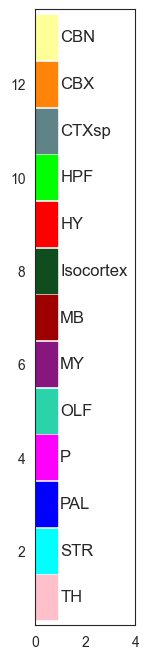

In [35]:
CA_module_dicts = []

strucs = np.unique(list(structure_dict.values()))

data = []
ls = len(strucs)
fig = plt.figure(figsize=(9,ls))    
sns.set_style("white")

for i,struc in enumerate(strucs):    
    regions = [k for k,v in structure_dict.items() if v==struc]
    num_regions = len(regions)
    print(i,struc,regions,num_regions)
    
    feature = corr.loc[regions,regions]
    scores,mean = extracted_scores(feature) 
    
    data.append(scores)      
    print(value_color_dict[struc],mean)
    
    module_dict = module_dict_template.copy()
    module_dict['module_class']='CA'
    module_dict['module_name']=struc
    module_dict['module_regions']=regions
    module_dict['module_corrs']=feature
    module_dict['module_consistency']=mean
    CA_module_dicts.append(module_dict)
    
    ax = fig.add_subplot(ls,1,i+1)
    sns.boxplot(scores,fliersize=5,width=1.2,linewidth=2,orient='h',color=value_color_dict[struc],ax=ax)            
    # ax.text(mean,0.65,round(mean,2),va='center',ha='center',fontsize=22)   
    
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylim([-1,1])
    ax.set_yticks([])
    ax.set_ylabel(f'{struc}    ',fontsize=22,rotation=0,va='center')
    ax.set_xlim([-0.4,1])   
    ax.set_xlabel('')
    if i!=len(strucs)-1:
        ax.spines['bottom'].set_visible(False)
        ax.set_xticks([]) 
    else:
        ax.set_xticklabels([-0.4,-0.2,0,0.2,0.4,0.6,0.8,1],fontsize=22)  
        
        
plt.subplots_adjust(hspace=0,left=0.5,right=0.99)
plt.savefig(f'./intra-structure-region-consistency-on-regional-distri-corr.png',dpi=600)  
plt.close()

fig = plt.figure(figsize=(1,8)) 
for i,struc in enumerate(strucs):
    plt.scatter(x=[0],y=[13-i],s=1000,marker='s',color=value_color_dict[struc])
    plt.text(1,13-i,struc,ha='left',va='center',fontsize=12)
plt.xlim([0,4])
plt.subplots_adjust(hspace=0,left=0,right=1)
plt.savefig(f'./structure_cbar.png',dpi=600)  

In [36]:
CA_module_dicts

[{'module_class': 'CA',
  'module_name': 'CBN',
  'module_regions': ['IP', 'DN', 'FN', 'VeCB'],
  'module_corrs':             IP        DN        FN      VeCB
  IP    1.000000  0.764156  0.720808  0.759504
  DN    0.764156  1.000000  0.618271  0.596532
  FN    0.720808  0.618271  1.000000  0.714964
  VeCB  0.759504  0.596532  0.714964  1.000000,
  'module_consistency': 0.6957059171464053},
 {'module_class': 'CA',
  'module_name': 'CBX',
  'module_regions': ['LING',
   'CENT',
   'CUL',
   'DEC',
   'FOTU',
   'PYR',
   'UVU',
   'NOD',
   'SIM',
   'AN',
   'PRM',
   'COPY',
   'PFL',
   'FL'],
  'module_corrs':           LING      CENT       CUL       DEC      FOTU       PYR       UVU   
  LING  1.000000  0.630875  0.674046  0.707271  0.507049  0.633324  0.629050  \
  CENT  0.630875  1.000000  0.824701  0.708389  0.551084  0.696140  0.624740   
  CUL   0.674046  0.824701  1.000000  0.799780  0.650557  0.698240  0.672995   
  DEC   0.707271  0.708389  0.799780  1.000000  0.838444  0.83

# plot fig2b: region-related modules

In [37]:
is_target_module_dicts=[]
cs_target_module_dicts=[]

score_thresh = 0.5
regions = corr.index.tolist()
is_targetmodules = []
cs_targetmodules = []
ir = 0
for region in regions:
    corr_tmp = corr.sort_values(by=region,ascending=False)
    targetmodule = corr_tmp.index[corr_tmp[region]>=score_thresh].tolist()
    targetscore = corr_tmp[region].loc[targetmodule].tolist()[1:]
    
    if len(targetmodule)>1: 
        score = sum(targetscore)/len(targetscore)
            
        module_dict = module_dict_template.copy()
        module_dict['module_class']='target'
        module_dict['module_name']=region
        module_dict['module_regions']=targetmodule[1:]
        module_dict['module_corrs']=corr_tmp[region].loc[targetmodule][1:]
        module_dict['module_consistency']=score
         
        strucs = set([structure_dict[r] for r in targetmodule])    
        if len(strucs)==1: 
            is_targetmodules.append([ir+1,region,targetmodule,targetscore,score])
            is_target_module_dicts.append(module_dict)
            print(is_targetmodules[-1],'is',len(is_targetmodules),)
        else:
            cs_targetmodules.append([ir+1,region,targetmodule,targetscore,score])
            cs_target_module_dicts.append(module_dict)
            print(cs_targetmodules[-1],'cs',len(cs_targetmodules),)
        ir += 1

[1, 'TMv', ['TMv', 'PMv', 'TU', 'LM', 'MM', 'PMd'], [0.804368078142881, 0.579612549758085, 0.54730652053278, 0.547140031212553, 0.54091186936736], 0.6038678098027317] is 1
[2, 'IC', ['IC', 'NB', 'NLL', 'CENT', 'SCm', 'CUL', 'SIM', 'POL', 'NTB', 'PoT', 'SOC', 'AN', 'PG', 'TRN', 'PRM', 'CUN'], [0.690577263678091, 0.666252306859151, 0.641916235007115, 0.592621685925398, 0.590103869407132, 0.582558500436135, 0.581696428538718, 0.573369238690269, 0.566095222554726, 0.563468903330535, 0.530340756049351, 0.526489442943636, 0.515989366630787, 0.510087288653598, 0.504448793289086], 0.5757343534662486] cs 1
[3, 'PSV', ['PSV', 'SPVI', 'SPVC', 'SPVO', 'MDRNd', 'GRN', 'V', 'PARN', 'MDRNv', 'AMB', 'LIN', 'I5', 'PGRNl', 'IRN', 'Acs5', 'PC5', 'P5', 'SOC', 'GR', 'VCO', 'XII', 'NTB', 'VII', 'RO', 'LRN', 'NR', 'NLL', 'VI', 'MARN', 'CU', 'x', 'PRNc', 'RM', 'Pa5', 'ACVII', 'MV', 'NB', 'PB', 'ECU', 'NTS'], [0.816296274408191, 0.757399110803271, 0.74867096347398, 0.721630933539224, 0.69699012773316, 0.689212

In [38]:
print(len(is_target_module_dicts),is_target_module_dicts)

11 [{'module_class': 'target', 'module_name': 'TMv', 'module_regions': ['PMv', 'TU', 'LM', 'MM', 'PMd'], 'module_corrs': PMv    0.804368
TU     0.579613
LM     0.547307
MM     0.547140
PMd    0.540912
Name: TMv, dtype: float64, 'module_consistency': 0.6038678098027317}, {'module_class': 'target', 'module_name': 'PVpo', 'module_regions': ['PVa', 'PVi', 'OV', 'SBPV', 'SCH', 'AVPV', 'MPN', 'VMPO', 'RCH'], 'module_corrs': PVa     0.750903
PVi     0.680780
OV      0.644761
SBPV    0.638937
SCH     0.621152
AVPV    0.605342
MPN     0.589967
VMPO    0.568002
RCH     0.545545
Name: PVpo, dtype: float64, 'module_consistency': 0.6272654070876444}, {'module_class': 'target', 'module_name': 'SCH', 'module_regions': ['RCH', 'ARH', 'SBPV', 'PVpo', 'MPN', 'PVa', 'PVi', 'MPO', 'AVPV', 'DMH', 'AVP', 'VMPO', 'AHN'], 'module_corrs': RCH     0.722672
ARH     0.660036
SBPV    0.634128
PVpo    0.621152
MPN     0.600548
PVa     0.592983
PVi     0.559628
MPO     0.558990
AVPV    0.546744
DMH     0.542696
AVP 

In [39]:
print(len(cs_target_module_dicts),cs_target_module_dicts)

302 [{'module_class': 'target', 'module_name': 'IC', 'module_regions': ['NB', 'NLL', 'CENT', 'SCm', 'CUL', 'SIM', 'POL', 'NTB', 'PoT', 'SOC', 'AN', 'PG', 'TRN', 'PRM', 'CUN'], 'module_corrs': NB      0.690577
NLL     0.666252
CENT    0.641916
SCm     0.592622
CUL     0.590104
SIM     0.582559
POL     0.581696
NTB     0.573369
PoT     0.566095
SOC     0.563469
AN      0.530341
PG      0.526489
TRN     0.515989
PRM     0.510087
CUN     0.504449
Name: IC, dtype: float64, 'module_consistency': 0.5757343534662486}, {'module_class': 'target', 'module_name': 'PSV', 'module_regions': ['SPVI', 'SPVC', 'SPVO', 'MDRNd', 'GRN', 'V', 'PARN', 'MDRNv', 'AMB', 'LIN', 'I5', 'PGRNl', 'IRN', 'Acs5', 'PC5', 'P5', 'SOC', 'GR', 'VCO', 'XII', 'NTB', 'VII', 'RO', 'LRN', 'NR', 'NLL', 'VI', 'MARN', 'CU', 'x', 'PRNc', 'RM', 'Pa5', 'ACVII', 'MV', 'NB', 'PB', 'ECU', 'NTS'], 'module_corrs': SPVI     0.816296
SPVC     0.757399
SPVO     0.748671
MDRNd    0.721631
GRN      0.696990
V        0.689213
PARN     0.684935


In [40]:
for smodules,pre in zip([is_targetmodules,cs_targetmodules],['is','cs']):
    write_json(smodules,f'../middle_files/targetmodules_{pre}.txt')

    wl = len(smodules)
    hl = max([len(m[2]) for m in smodules])
    df_smodule = pd.DataFrame(np.zeros((hl,wl)),columns=[m[0] for m in smodules])
    for ir,region,smodule,scores,score in smodules:
        df_smodule[ir] = smodule + ['']*(hl-len(smodule))
    df_smodule.to_csv(f'./targetmodules_{pre}.csv',index=False)

is 1 TMv red ['TMv', 'PMv', 'TU', 'LM', 'MM', 'PMd'] [0.804368078142881, 0.579612549758085, 0.54730652053278, 0.547140031212553, 0.54091186936736] 0.6038678098027317
is 38 PVpo red ['PVpo', 'PVa', 'PVi', 'OV', 'SBPV', 'SCH', 'AVPV', 'MPN', 'VMPO', 'RCH'] [0.750903110577497, 0.680779889703962, 0.644760511818272, 0.638936744940479, 0.621152455088339, 0.605341968201389, 0.589967072397358, 0.568001952518543, 0.545544958542962] 0.6272654070876444
is 87 SCH red ['SCH', 'RCH', 'ARH', 'SBPV', 'PVpo', 'MPN', 'PVa', 'PVi', 'MPO', 'AVPV', 'DMH', 'AVP', 'VMPO', 'AHN'] [0.722672371247995, 0.660036144691309, 0.634128315403523, 0.621152455088339, 0.600547962539362, 0.592983181602062, 0.559627572555085, 0.558990285933238, 0.54674394535165, 0.542695692978833, 0.535334833200862, 0.515955769208493, 0.506741524868903] 0.5844315426668965
is 104 SFO red ['SFO', 'ME'] [0.50729380504417] 0.50729380504417
is 110 SSp-n #0f4d1f ['SSp-n', 'SSp-m', 'SSp-ul', 'SSs', 'SSp-bfd', 'VISrl', 'SSp-un', 'SSp-ll', 'AUDv', '

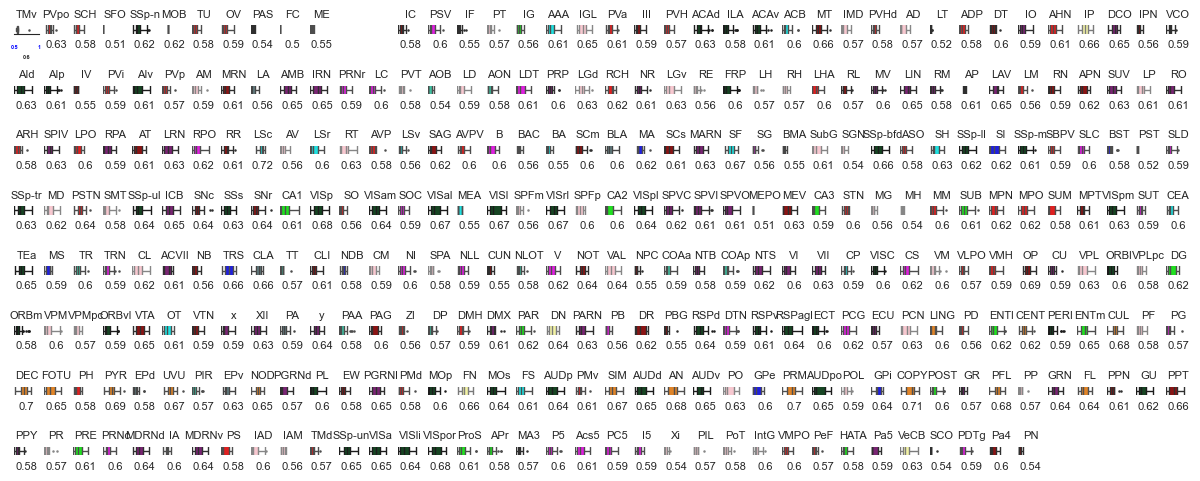

In [41]:
# paraview has draw all target modules

# draw all score here:

iax = 1
ws = 12
hs = 5
f = 8
fig = plt.figure(figsize=(ws,hs)) 

w = 40
h = 8

lpre = 'is'
for pre,targetmodules in zip(['is','cs'],[is_targetmodules,cs_targetmodules]):
    for ir,region,smodule,scores,score in targetmodules:
        if pre!=lpre:
            print('\n')
            iax += 2
            
        color = color_dict[region]
        print(pre,ir,region,color,smodule,scores,score) 

        ax = fig.add_subplot(h,w,iax)
        if iax==1:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=0.8,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_title(region,fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([0.5,1])
            ax.set_xticks([0.5,1])   
            ax.set_xticklabels([0.5,1],fontsize=f/2,color='blue',weight='bold')
            ax.set_xlabel(str(round(score,2)),fontsize=f/2,weight='bold')
            
        else:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=4,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_title(region,fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([0.5,1])
            ax.set_xticks([])   
            ax.set_xlabel(str(round(score,2)),fontsize=f)
            
        iax += 1
        lpre = pre
plt.subplots_adjust(hspace=6,wspace=0.2,left=0.01,right=0.99,bottom=0.07,top=0.93)
plt.savefig(f'./targetmodules_scoreboxplot.png',dpi=400)  


(2000, 4800, 4)
(1936, 4790, 4)
242.0


C:\Users\user\AppData\Local\Temp\ipykernel_25860\3231735115.py:3: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./targetmodules_scoreboxplot.png')


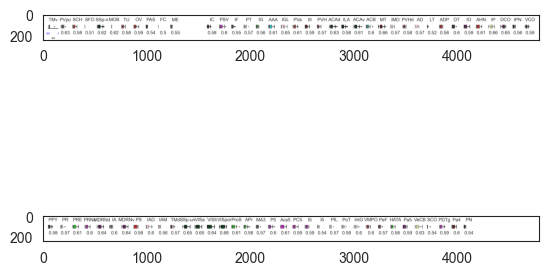

In [42]:
# try divide here:

img = imageio.imread('./targetmodules_scoreboxplot.png')
print(img.shape)
img = img[40:-24,:-10,:]
print(img.shape)
sp = int(img.shape[0]/h)
print(img.shape[0]/h)

fig = plt.figure() 
ax = fig.add_subplot(2,1,1)
ax.imshow(img[sp*0:sp*1,:])
ax = fig.add_subplot(2,1,2)
ax.imshow(img[sp*(h-1):sp*h,:])

In [120]:
# make final targetmodule img here:

tmsfile = f'./targetmodules_scoreboxplot.png'
tms = imageio.imread(tmsfile)
tms = tms[40:-24,:-10,:]
sp = int(tms.shape[0]/h)

s = 1
iax = 1

w = 40
h = 8

lpre = 'is'
vtk_img = []
for pre,targetmodules in zip(['is','cs'],[is_targetmodules,cs_targetmodules]):
    for ir,region,smodule,scores,score in targetmodules:            
        color = color_dict[region]
        #print(pre,ir,region,color,smodule,scores,score) 

        if pre!=lpre:
            print(pre,'\n')
            vtk = 255*np.ones(vtk.shape)
            vtk = np.concatenate([vtk,vtk],axis=1)
            vtk_img = np.concatenate([vtk_img,vtk],axis=1)
            iax += 2

        vtkfile = f'./targetmodules_{pre}_{region}.jpeg'
        vtk = imageio.imread(vtkfile)
        vtk = np.rot90(vtk,3,(0,1))
        vtk = vtk[560:-560,240:-240,:]
        chan = 255*np.ones((vtk.shape[0],vtk.shape[1],1))
        vtk = np.concatenate([vtk,chan],axis=2)

        if not len(vtk_img): 
            vtk_img = vtk.copy()
        else:
            vtk_img = np.concatenate([vtk_img,vtk],axis=1)
        print(iax, pre,region, vtk_img.shape)

        if iax%w==0 or iax==313+2:
            tmsfile_ = f'./targetmodules_{s}__.png'
            tms_img = tms[sp*(s-1):sp*s,:,:]
            if iax==313+2:
                tms_img = tms[sp*(s-1):sp*s,:,:]
                tms_img = tms_img[:,:int(tms_img.shape[1]*35/w),:]
            #print(tms_img.shape)
            imageio.imwrite(tmsfile_,tms_img)
            pil = Image.open(tmsfile_)
            pil_new = pil.resize( (vtk_img.shape[1], int(tms_img.shape[0]*vtk_img.shape[1]/tms_img.shape[1]) ) )
            #print(pil_new.size)
            pil_new.save(tmsfile_)
            tms_img = imageio.imread(tmsfile_)
            print('concate boxplot: ',tms_img.shape)

            vtk_img = np.concatenate([tms_img,vtk_img],axis=0).astype(np.uint8)
            #print(vtk_img.shape)
            imageio.imwrite(f'./targetmodules_{s}.png',vtk_img)

            s += 1
            vtk_img = []

        iax += 1
        lpre = pre
        

C:\Users\user\AppData\Local\Temp\ipykernel_25860\3379326667.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tms = imageio.imread(tmsfile)
C:\Users\user\AppData\Local\Temp\ipykernel_25860\3379326667.py:29: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  vtk = imageio.imread(vtkfile)


1 is TMv (812, 618, 4)
2 is PVpo (812, 1236, 4)
3 is SCH (812, 1854, 4)
4 is SFO (812, 2472, 4)
5 is SSp-n (812, 3090, 4)
6 is MOB (812, 3708, 4)
7 is TU (812, 4326, 4)
8 is OV (812, 4944, 4)
9 is PAS (812, 5562, 4)
10 is FC (812, 6180, 4)
11 is ME (812, 6798, 4)
cs 

14 cs IC (812, 8652, 4)
15 cs PSV (812, 9270, 4)
16 cs IF (812, 9888, 4)
17 cs PT (812, 10506, 4)
18 cs IG (812, 11124, 4)
19 cs AAA (812, 11742, 4)
20 cs IGL (812, 12360, 4)
21 cs PVa (812, 12978, 4)
22 cs III (812, 13596, 4)
23 cs PVH (812, 14214, 4)
24 cs ACAd (812, 14832, 4)
25 cs ILA (812, 15450, 4)
26 cs ACAv (812, 16068, 4)
27 cs ACB (812, 16686, 4)
28 cs MT (812, 17304, 4)
29 cs IMD (812, 17922, 4)
30 cs PVHd (812, 18540, 4)
31 cs AD (812, 19158, 4)
32 cs LT (812, 19776, 4)
33 cs ADP (812, 20394, 4)
34 cs DT (812, 21012, 4)
35 cs IO (812, 21630, 4)
36 cs AHN (812, 22248, 4)
37 cs IP (812, 22866, 4)
38 cs DCO (812, 23484, 4)
39 cs IPN (812, 24102, 4)
40 cs VCO (812, 24720, 4)


C:\Users\user\AppData\Local\Temp\ipykernel_25860\3379326667.py:53: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tms_img = imageio.imread(tmsfile_)


concate boxplot:  (1248, 24720, 4)
41 cs AId (812, 618, 4)
42 cs AIp (812, 1236, 4)
43 cs IV (812, 1854, 4)
44 cs PVi (812, 2472, 4)
45 cs AIv (812, 3090, 4)
46 cs PVp (812, 3708, 4)
47 cs AM (812, 4326, 4)
48 cs MRN (812, 4944, 4)
49 cs LA (812, 5562, 4)
50 cs AMB (812, 6180, 4)
51 cs IRN (812, 6798, 4)
52 cs PRNr (812, 7416, 4)
53 cs LC (812, 8034, 4)
54 cs PVT (812, 8652, 4)
55 cs AOB (812, 9270, 4)
56 cs LD (812, 9888, 4)
57 cs AON (812, 10506, 4)
58 cs LDT (812, 11124, 4)
59 cs PRP (812, 11742, 4)
60 cs LGd (812, 12360, 4)
61 cs RCH (812, 12978, 4)
62 cs NR (812, 13596, 4)
63 cs LGv (812, 14214, 4)
64 cs RE (812, 14832, 4)
65 cs FRP (812, 15450, 4)
66 cs LH (812, 16068, 4)
67 cs RH (812, 16686, 4)
68 cs LHA (812, 17304, 4)
69 cs RL (812, 17922, 4)
70 cs MV (812, 18540, 4)
71 cs LIN (812, 19158, 4)
72 cs RM (812, 19776, 4)
73 cs AP (812, 20394, 4)
74 cs LAV (812, 21012, 4)
75 cs LM (812, 21630, 4)
76 cs RN (812, 22248, 4)
77 cs APN (812, 22866, 4)
78 cs SUV (812, 23484, 4)
79 cs LP

# plot fig2c: dendrogram initial modules

In [44]:
merge = pd.read_csv('../middle_files/merge.csv')
merge

,V1,V2
1,-241,-243
2,-128,-266
3,-120,-122
4,-55,-248
5,-126,-152
...,...,...
309,293,305
310,306,307
311,308,309
312,300,310


In [45]:
order = pd.read_csv('../middle_files/order.csv')
order

,x
1,166
2,286
3,73
4,110
5,21
...,...
310,303
311,2
312,179
313,127


In [46]:
# merge = pd.read_csv('merge.csv')
parent_dict = {}
for p,kids in merge.iterrows():
    parent_dict[p] = [k for k in kids]
print(len(parent_dict),parent_dict )
logickids = set(sum(list(parent_dict.values()),[]))
print(len(logickids),logickids)

kid_path_dict = {}
# order = pd.read_csv('order.csv')

for kid in sum(order.values.tolist(),[]):
    parent = [p for p,k in parent_dict.items() if -kid in k][0]
    kid_path_dict[-kid] = [-kid,parent]
    while parent in logickids:
        parent = [p for p,k in parent_dict.items() if parent in k][0]
        kid_path_dict[-kid].append(parent)
print(len(kid_path_dict),kid_path_dict)
logics = set(sum(list(kid_path_dict.values()),[]))
print(len(logics),logics)


313 {1: [-241, -243], 2: [-128, -266], 3: [-120, -122], 4: [-55, -248], 5: [-126, -152], 6: [-221, -224], 7: [-118, -291], 8: [-116, -200], 9: [-136, -137], 10: [-261, -265], 11: [-29, -34], 12: [-124, -130], 13: [-12, -255], 14: [-260, 2], 15: [-135, -294], 16: [-238, -239], 17: [-41, -216], 18: [-192, -197], 19: [-61, -76], 20: [-146, -295], 21: [-31, -185], 22: [-259, 10], 23: [-78, -276], 24: [-225, -233], 25: [-159, -228], 26: [-72, -204], 27: [-117, -187], 28: [-114, -292], 29: [-48, -226], 30: [-293, 14], 31: [-119, -310], 32: [-214, -234], 33: [-132, 12], 34: [-155, -257], 35: [-77, -186], 36: [-107, -111], 37: [-157, -180], 38: [-232, -235], 39: [-95, -250], 40: [-121, 36], 41: [-158, -237], 42: [-8, -305], 43: [-176, -263], 44: [-174, -298], 45: [-123, -134], 46: [-40, -285], 47: [-181, -191], 48: [-7, -93], 49: [-173, -178], 50: [-15, -106], 51: [-1, -258], 52: [5, 33], 53: [-13, -196], 54: [-26, -64], 55: [-67, -278], 56: [-33, -51], 57: [-101, 7], 58: [-141, -195], 59: [-1

In [47]:
initial_module_dicts = []

regions = corr.index.tolist()
leafs = regions.copy()
im = 0
is_intermodules = []
cs_intermodules = []
seed = list(logics-logickids)
while len(leafs):
    cseed = seed[0]
    smodule = [regions[-k-1] for k,path in kid_path_dict.items() if cseed in path]
    print(len(leafs))
    print(len(seed),seed)
    #print(cseed,len(scores),mean)
    seed.remove(cseed)
    new_seeds = parent_dict[cseed]
    if (new_seeds[0]>0 and new_seeds[1]>0) and (len(smodule)<3 or len(smodule)>30):   
        seed = new_seeds + seed
    else:
        [leafs.remove(i) for i in smodule]
        df_smodule = corr.loc[smodule,smodule] 
        scores,score = extracted_scores(df_smodule)
        strucs = set([structure_dict[r] for r in smodule]) 
        
        module_dict = module_dict_template.copy()
        module_dict['module_class']='initial'
        module_dict['module_name']='M'+str(im+1)
        module_dict['module_regions']=smodule
        module_dict['module_corrs']=df_smodule
        module_dict['module_consistency']=score
        
        if len(strucs)==1: 
            is_intermodules.append([im+1,smodule,scores,score])
            print(is_intermodules[-1],'is',len(is_intermodules))
            initial_module_dicts.append(module_dict)
        else:
            cs_intermodules.append([im+1,smodule,scores,score])
            print(cs_intermodules[-1],'cs',len(cs_intermodules))
            initial_module_dicts.append(module_dict)
        im += 1
print('claculted over!\n')
    
for smodules,pre in zip([is_intermodules,cs_intermodules],['is','cs']):
    write_json(str(smodules),f'../middle_files/intermodules_{pre}.txt')

    if len(smodules):
        wl = len(smodules)
        hl = max([len(m[1]) for m in smodules])
        df_smodule = pd.DataFrame(np.zeros((hl,wl)),columns=['M'+str(m[0]) for m in smodules])
        for im,smodule,scores,score in smodules:
            df_smodule['M'+str(im)] = smodule + ['']*(hl-len(smodule))
        df_smodule.to_csv(f'./intermodules_{pre}.csv',index=False)
        print(f'save {pre} csv here')

314
1 [313]
314
2 [311, 312]
314
3 [308, 309, 312]
314
4 [301, 304, 309, 312]
314
5 [267, 298, 304, 309, 312]
[1, ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'], [0.523656030185866, 0.665655862717532, 0.543215159224887, 0.475062638526898, 0.594402837013426, 0.565126017336778, 0.640319405906169, 0.664124116446382, 0.704504524900474, 0.675538017886287, 0.501621230899075, 0.620809379251048, 0.721716562488956, 0.724736540956437, 0.565171618767822, 0.543415010701695, 0.656723662805501, 0.720117882671019, 0.567879158887245, 0.443706224609397, 0.500766754184271, 0.713328359713885, 0.358947988421829, 0.508195034867423, 0.644962712824567, 0.60314167234879, 0.603496064670076, 0.82612726655427], 0.602730990563143] cs 1
306
4 [298, 304, 309, 312]
[2, ['MA3', 'LH', 'MH', 'MEPO', 'SCO', 'LC', 'MEV', 'PVp', 'SO', 'PMd', 'TMd', 'TU', 'TMv', 'PMv', 'SUM', 'PH', 'ARH', 'BAC', 'ASO', 'PD', 'AHN', 'DMH', 'PVH', 'VMH'], [0.422841029260168, 0.551336687033518, 0.162125588075646, 0.380222075630829, 

In [48]:
print(len(initial_module_dicts),initial_module_dicts)

18 [{'module_class': 'initial', 'module_name': 'M1', 'module_regions': ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'], 'module_corrs':            NDB        PS       LPO       BST       ADP      VLPO       AVP   
NDB   1.000000  0.523656  0.665656  0.543215  0.475063  0.594403  0.565126  \
PS    0.523656  1.000000  0.664124  0.704505  0.675538  0.501621  0.620809   
LPO   0.665656  0.664124  1.000000  0.724737  0.565172  0.543415  0.656724   
BST   0.543215  0.704505  0.724737  1.000000  0.567879  0.443706  0.500767   
ADP   0.475063  0.675538  0.565172  0.567879  1.000000  0.358948  0.508195   
VLPO  0.594403  0.501621  0.543415  0.443706  0.358948  1.000000  0.603142   
AVP   0.565126  0.620809  0.656724  0.500767  0.508195  0.603142  1.000000   
MPO   0.640319  0.721717  0.720118  0.713328  0.644963  0.603496  0.826127   

           MPO  
NDB   0.640319  
PS    0.721717  
LPO   0.720118  
BST   0.713328  
ADP   0.644963  
VLPO  0.603496  
AVP   0.826127  
MPO   1.000000  

is 3 ['SFO', 'OV', 'SBPV', 'PVi', 'RCH', 'AVPV', 'MPN', 'PVpo', 'SCH', 'PVa', 'VMPO'] 0.5662917019847524 0.0971051371234194 #51B365
is 5 ['ECT', 'PERI', 'RSPv', 'RSPd', 'RSPagl', 'SSp-bfd', 'SSp-ul', 'SSp-un', 'SSp-ll', 'SSp-tr', 'VISa', 'AUDv', 'TEa', 'AUDp', 'VISam', 'VISpm', 'VISrl', 'VISp', 'VISl', 'VISpl', 'VISpor', 'VISli', 'AUDd', 'VISal', 'AUDpo'] 0.6752354660538342 0.362584182171943 #36A055
cs 1 ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'] 0.602730990563143 0.358947988421829 #51B365
cs 2 ['MA3', 'LH', 'MH', 'MEPO', 'SCO', 'LC', 'MEV', 'PVp', 'SO', 'PMd', 'TMd', 'TU', 'TMv', 'PMv', 'SUM', 'PH', 'ARH', 'BAC', 'ASO', 'PD', 'AHN', 'DMH', 'PVH', 'VMH'] 0.37883787032580524 -0.109132437666684 #92D28E
cs 4 ['PRE', 'POST', 'APr', 'HATA', 'SUB', 'ProS', 'PA', 'ENTl', 'PAR', 'ENTm'] 0.679121742757605 0.501804664186416 #36A055
cs 6 ['CA1', 'CA2', 'CA3', 'DG', 'SSs', 'SSp-m', 'SSp-n', 'ACAv', 'ACAd', 'MOs'] 0.5206529600313627 0.169803322526488 #74C476
cs 7 ['ILA', 'ORBm', 'MOp'

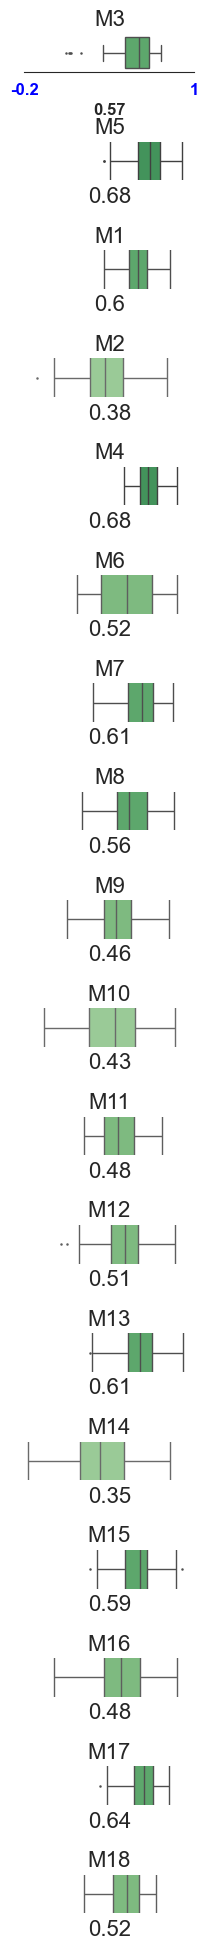

In [49]:
def get_colorcode16_list(value_list,nc=10,cmap='Greens_r',reverse=False):        
    rgblist = (np.array(sns.color_palette(cmap,nc+1))*255).astype(int)
    if reverse: 
        rgblist = rgblist[nc::-1,:]
    code16_list = ["".join([hex(c)[2:].rjust(2,'0').upper() for c in rgb]) for rgb in rgblist]
    value_code16_list = [code16_list[v] for v in value_list]
    return value_code16_list
colorcode = get_colorcode16_list(list(range(11)),nc=10,cmap='Greens_r',reverse=True)

iax = 1

f = 16
ws = 2
hs = 20
fig = plt.figure(figsize=(ws,hs)) 

w = 1
h = 18
for pre,intermodule in zip(['is','cs'],[is_intermodules,cs_intermodules]):
    for im,modules,scores,score in intermodule:  
        c = int(round(score*10))
        color='#'+colorcode[c]
        print(pre,im,modules,score,min(scores),color) 

        ax = fig.add_subplot(h,w,iax)
        if iax==1:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=0.8,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_title('M'+str(im),fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([-0.2,1])
            ax.set_xticks([-0.2,1])   
            ax.set_xticklabels([-0.2,1],fontsize=f-4,color='blue',weight='bold')
            ax.set_xlabel(str(round(score,2)),fontsize=f-4,weight='bold')      
        else:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=4,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_title('M'+str(im),fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([-0.2,1])
            ax.set_xticks([])   
            ax.set_xlabel(str(round(score,2)),fontsize=f)
        
        iax += 1
        plt.subplots_adjust(hspace=1.8,wspace=0.5,left=0.1,right=0.95,bottom=0.03,top=0.97)
plt.savefig(f'./intermodules_scoreboxplot.png',dpi=400)   


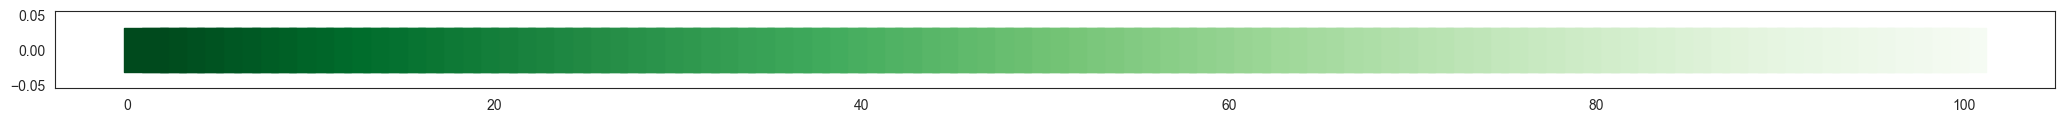

In [50]:
color_list = get_colorcode16_list(list(range(100)),nc=100,cmap='Greens')
fig = plt.figure(figsize=(20,1)) 
for i in range(100):
    plt.scatter(x=[100-i],y=0,s=1000,marker='s',color='#'+color_list[i])
plt.subplots_adjust(hspace=0,left=0,right=1)
plt.savefig(f'./corr_cbar.png',dpi=300) 

(8000, 800, 4)
432.0


C:\Users\user\AppData\Local\Temp\ipykernel_25860\2559686625.py:4: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread('./intermodules_scoreboxplot.png')


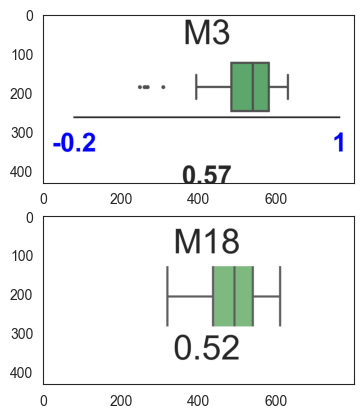

In [51]:
h = 18
import imageio 
from matplotlib import pyplot as plt
img = imageio.imread('./intermodules_scoreboxplot.png')
print(img.shape)
img = img[132:-92,::,:]
# print(img.shape)
sp = img.shape[0]/h
print(sp)
sp = int(sp)
fig = plt.figure() 
ax = fig.add_subplot(2,1,1)
ax.imshow(img[sp*0:sp*1,:,:])
ax = fig.add_subplot(2,1,2)
ax.imshow(img[sp*(h-1):sp*h,:,:])

In [82]:
tmsfile = f'./intermodules_scoreboxplot.png'
tms = imageio.imread(tmsfile)
tms = tms[132:-92,::,:]
sp = int(tms.shape[0]/h)

s = 1
iax = 1
itms = 1
lpre = 'is'
total_img = []
for pre,intermodules in zip(['is','cs'],[is_intermodules,cs_intermodules]):
    for ir,smodule,scores,score in intermodules:      

        if pre!=lpre:
            vtk_img = 255*np.ones(vtk_img.shape)
            total_img = np.concatenate([total_img,vtk_img],axis=1).astype(np.uint8)
            iax += 1
    
        vtkfile = f'./intermodules_{pre}_{ir}.jpeg'
        vtk = imageio.imread(vtkfile)
        vtk = np.rot90(vtk,3,(0,1))
        vtk = vtk[560:-560,240:-240,:]
        chan = 255*np.ones((vtk.shape[0],vtk.shape[1],1))
        vtk = np.concatenate([vtk,chan],axis=2)
        
        tmsfile_ = f'./intermodules_{ir}_.png'
        tms_img = tms[sp*(itms-1):sp*itms,:,:]
        imageio.imwrite(tmsfile_,tms_img)
        pil = Image.open(tmsfile_)
        pil_new = pil.resize( (vtk.shape[1], int(tms_img.shape[0]*vtk.shape[1]/tms_img.shape[1]) ) )
        pil_new.save(tmsfile_)
        
        tms_img = imageio.imread(tmsfile_)
        print(tms_img.shape,vtk.shape)
        vtk_img = np.concatenate([tms_img,vtk],axis=0)
    
        print(iax,pre,ir,vtk_img.shape)
        if not len(total_img): 
            total_img = vtk_img.copy()
        else:
            total_img = np.concatenate([total_img,vtk_img],axis=1).astype(np.uint8)
            print(total_img.shape)
    
        
        if iax%7==0:
            imageio.imwrite(f'./intermodules_{s}.png',total_img)
            total_img = []
            s+=1
            print('save')
             
        iax += 1
        itms += 1
        lpre = pre
        
if len(total_img):   
    imageio.imwrite(f'./intermodules_{s}.png',total_img)

C:\Users\user\AppData\Local\Temp\ipykernel_25860\3320627595.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tms = imageio.imread(tmsfile)
C:\Users\user\AppData\Local\Temp\ipykernel_25860\3320627595.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  vtk = imageio.imread(vtkfile)
C:\Users\user\AppData\Local\Temp\ipykernel_25860\3320627595.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

(333, 618, 4) (812, 618, 4)
1 is 3 (1145, 618, 4)
(333, 618, 4) (812, 618, 4)
2 is 5 (1145, 618, 4)
(1145, 1236, 4)
(333, 618, 4) (812, 618, 4)
4 cs 1 (1145, 618, 4)
(1145, 2472, 4)
(333, 618, 4) (812, 618, 4)
5 cs 2 (1145, 618, 4)
(1145, 3090, 4)
(333, 618, 4) (812, 618, 4)
6 cs 4 (1145, 618, 4)
(1145, 3708, 4)
(333, 618, 4) (812, 618, 4)
7 cs 6 (1145, 618, 4)
(1145, 4326, 4)
save
(333, 618, 4) (812, 618, 4)
8 cs 7 (1145, 618, 4)
(333, 618, 4) (812, 618, 4)
9 cs 8 (1145, 618, 4)
(1145, 1236, 4)
(333, 618, 4) (812, 618, 4)
10 cs 9 (1145, 618, 4)
(1145, 1854, 4)
(333, 618, 4) (812, 618, 4)
11 cs 10 (1145, 618, 4)
(1145, 2472, 4)
(333, 618, 4) (812, 618, 4)
12 cs 11 (1145, 618, 4)
(1145, 3090, 4)
(333, 618, 4) (812, 618, 4)
13 cs 12 (1145, 618, 4)
(1145, 3708, 4)
(333, 618, 4) (812, 618, 4)
14 cs 13 (1145, 618, 4)
(1145, 4326, 4)
save
(333, 618, 4) (812, 618, 4)
15 cs 14 (1145, 618, 4)
(333, 618, 4) (812, 618, 4)
16 cs 15 (1145, 618, 4)
(1145, 1236, 4)
(333, 618, 4) (812, 618, 4)
17 cs 1

# plot fig2c: dendrogram tight modules, merge region-sets and modules

In [83]:
tight_module_dicts = []

intermodules = is_intermodules + cs_intermodules
intermodules = [ [module[1] for module in intermodules if i+1==module[0]][0] for i in range(18)]
targetmodules = is_targetmodules + cs_targetmodules
targetmodules = [ [module[2] for module in targetmodules if i+1==module[0]][0] for i in range(313)]
is_interregionsets = []
cs_interregionsets = []
for ii,intersmodule in enumerate(intermodules):
    if_thresh = min(len(intersmodule),2)#int(len(intersmodule)/2)
    print(intersmodule,if_thresh)
    interregions = []
    for region in intersmodule:
        for targetsmodule in targetmodules:
            if targetsmodule[0]==region:
                interregions.extend(targetsmodule)
    print(interregions)
    r,ifr = np.unique(interregions,return_counts=True)
    smodule = [sr for sr in intersmodule if ifr[r==sr]>=if_thresh]
    print(smodule)
    if len(smodule)<len(intersmodule): print('pruned!')
    else: print('not pruned!')
    
    if len(smodule)>1:
        if len(smodule)!=len(intersmodule): print('note')
        df_smodule = corr.loc[smodule,smodule] 
        scores,score = extracted_scores(df_smodule)
        print('score',min(scores),score)
        strucs = set([structure_dict[r] for r in smodule]) 
        
        module_dict = module_dict_template.copy()
        module_dict['module_class']='tight'
        module_dict['module_name']='M'+str(ii+1)+'*'
        module_dict['module_regions']=smodule
        module_dict['module_corrs']=df_smodule
        module_dict['module_consistency']=score
        
        if len(strucs)==1: 
            is_interregionsets.append([ii+1,smodule,scores,score])
            print(is_interregionsets[-1],'is',len(is_interregionsets))
            tight_module_dicts.append(module_dict)
        else:
            cs_interregionsets .append([ii+1,smodule,scores,score])
            print(cs_interregionsets[-1],'cs',len(cs_interregionsets))
            tight_module_dicts.append(module_dict)
    print('\n')
    
for smodules,pre in zip([is_interregionsets,cs_interregionsets],['is','cs']):
    if len(smodules):
        write_json(smodules,f'../middle_files/interregionsets_{pre}.txt')
        wl = len(smodules)
        hl = max([len(m[1]) for m in smodules])
        df_smodule = pd.DataFrame(np.zeros((hl,wl)),columns=['M'+str(m[0])+'*' for m in smodules])
        for im,smodule,scores,score in smodules:
            df_smodule['M'+str(im)+'*'] = smodule + ['']*(hl-len(smodule))
        df_smodule.to_csv(f'./interregionsets_{pre}.csv',index=False)
        print('save {pre} here')

['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'] 2
['NDB', 'LPO', 'MPO', 'SO', 'VLPO', 'MS', 'AAA', 'AVP', 'MA', 'BST', 'AVPV', 'PS', 'PS', 'MPO', 'BST', 'ADP', 'LPO', 'AVP', 'MPN', 'PD', 'SBPV', 'NDB', 'PMd', 'SPA', 'SO', 'VLPO', 'LPO', 'BST', 'MPO', 'NDB', 'PS', 'AVP', 'LSv', 'IA', 'ADP', 'SO', 'ACB', 'VLPO', 'RCH', 'AAA', 'TMd', 'AHN', 'BST', 'LPO', 'MPO', 'PS', 'PD', 'IA', 'MEA', 'AHN', 'ACB', 'ADP', 'BAC', 'NDB', 'CEA', 'PH', 'LSv', 'LHA', 'MPN', 'AVP', 'ADP', 'PS', 'MPO', 'BST', 'LPO', 'AVP', 'SBPV', 'VLPO', 'VMPO', 'AVPV', 'MPO', 'AVP', 'NDB', 'SO', 'RCH', 'SBPV', 'LPO', 'AHN', 'PS', 'ASO', 'AVP', 'MPO', 'LPO', 'AVPV', 'MPN', 'PS', 'RCH', 'VLPO', 'VMPO', 'AHN', 'NDB', 'SBPV', 'DMH', 'SCH', 'LSv', 'OV', 'SO', 'TMd', 'ADP', 'BST', 'MPO', 'AVP', 'MPN', 'PS', 'LPO', 'BST', 'AHN', 'AVPV', 'RCH', 'SBPV', 'VMPO', 'ADP', 'NDB', 'PD', 'ASO', 'VLPO', 'DMH', 'TMd', 'BAC', 'SO', 'SCH', 'PH', 'LSv', 'VMH', 'PVa', 'PMd', 'OV', 'PVi']
['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', '

C:\Users\user\AppData\Local\Temp\ipykernel_25860\1840340303.py:19: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  smodule = [sr for sr in intersmodule if ifr[r==sr]>=if_thresh]


In [84]:
print(len(tight_module_dicts),tight_module_dicts)

18 [{'module_class': 'tight', 'module_name': 'M1*', 'module_regions': ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'], 'module_corrs':            NDB        PS       LPO       BST       ADP      VLPO       AVP   
NDB   1.000000  0.523656  0.665656  0.543215  0.475063  0.594403  0.565126  \
PS    0.523656  1.000000  0.664124  0.704505  0.675538  0.501621  0.620809   
LPO   0.665656  0.664124  1.000000  0.724737  0.565172  0.543415  0.656724   
BST   0.543215  0.704505  0.724737  1.000000  0.567879  0.443706  0.500767   
ADP   0.475063  0.675538  0.565172  0.567879  1.000000  0.358948  0.508195   
VLPO  0.594403  0.501621  0.543415  0.443706  0.358948  1.000000  0.603142   
AVP   0.565126  0.620809  0.656724  0.500767  0.508195  0.603142  1.000000   
MPO   0.640319  0.721717  0.720118  0.713328  0.644963  0.603496  0.826127   

           MPO  
NDB   0.640319  
PS    0.721717  
LPO   0.720118  
BST   0.713328  
ADP   0.644963  
VLPO  0.603496  
AVP   0.826127  
MPO   1.000000  ,

is 3 ['OV', 'SBPV', 'PVi', 'RCH', 'AVPV', 'MPN', 'PVpo', 'SCH', 'PVa', 'VMPO'] 0.6304518098498749 0.455750256352374 #51B365
is 5 ['ECT', 'PERI', 'RSPv', 'RSPd', 'RSPagl', 'SSp-bfd', 'SSp-ul', 'SSp-un', 'SSp-ll', 'SSp-tr', 'VISa', 'AUDv', 'TEa', 'AUDp', 'VISam', 'VISpm', 'VISrl', 'VISp', 'VISl', 'VISpl', 'VISpor', 'VISli', 'AUDd', 'VISal', 'AUDpo'] 0.6752354660538342 0.362584182171943 #36A055
cs 1 ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'] 0.602730990563143 0.358947988421829 #51B365
cs 2 ['MA3', 'LH', 'MH', 'SCO', 'LC', 'MEV', 'PVp', 'SO', 'PMd', 'TMd', 'TU', 'TMv', 'PMv', 'SUM', 'PH', 'ARH', 'BAC', 'ASO', 'PD', 'AHN', 'DMH', 'PVH', 'VMH'] 0.3919444835599439 -0.109132437666684 #92D28E
cs 4 ['PRE', 'POST', 'APr', 'HATA', 'SUB', 'ProS', 'PA', 'ENTl', 'PAR', 'ENTm'] 0.679121742757605 0.501804664186416 #36A055
cs 6 ['CA1', 'CA2', 'CA3', 'DG', 'SSs', 'SSp-m', 'SSp-n', 'ACAv', 'ACAd', 'MOs'] 0.5206529600313627 0.169803322526488 #74C476
cs 7 ['ILA', 'ORBm', 'MOp', 'ORBvl', 'FRP',

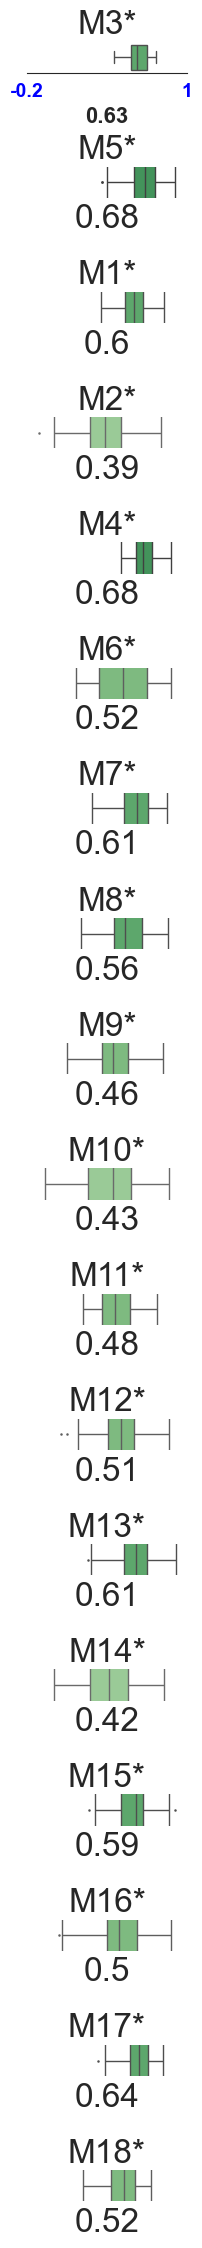

In [85]:
def get_colorcode16_list(value_list,nc=10,cmap='Greens_r',reverse=False):        
    rgblist = (np.array(sns.color_palette(cmap,nc+1))*255).astype(int)
    if reverse: 
        rgblist = rgblist[nc::-1,:]
    code16_list = ["".join([hex(c)[2:].rjust(2,'0').upper() for c in rgb]) for rgb in rgblist]
    value_code16_list = [code16_list[v] for v in value_list]
    return value_code16_list
colorcode = get_colorcode16_list(list(range(11)),nc=10,cmap='Greens_r',reverse=True)


iax = 1

ws = 2
hs = 24
f = 24
fig = plt.figure(figsize=(ws,hs)) 

w = 1
h = 18
for pre,intermodule in zip(['is','cs'],[is_interregionsets,cs_interregionsets]):
    for im,modules,scores,score in intermodule:  
        c = int(round(score*10))
        color='#'+colorcode[c]
        print(pre,im,modules,score,min(scores),color) 

        ax = fig.add_subplot(h,w,iax)
        if iax==1:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=0.8,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.set_title('M'+str(im)+'*',fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([-0.2,1])
            ax.set_xticks([-0.2,1])   
            ax.set_xticklabels([-0.2,1],fontsize=f-10,color='blue',weight='bold')
            ax.set_xlabel(str(round(score,2)),fontsize=f-8,weight='bold')      
        else:
            sns.boxplot(scores,fliersize=0.8,linewidth=1,width=4,orient='h',color=color,ax=ax)  
            ax.spines['top'].set_visible(False)
            ax.spines['left'].set_visible(False)
            ax.spines['right'].set_visible(False)
            ax.spines['bottom'].set_visible(False)
            ax.set_title('M'+str(im)+'*',fontsize=f)
            ax.set_yticks([])
            ax.set_ylabel('')
            ax.set_xlim([-0.2,1])
            ax.set_xticks([])   
            ax.set_xlabel(str(round(score,2)),fontsize=f)
        
        iax += 1
        plt.subplots_adjust(hspace=3,wspace=1,left=0.15,right=0.95,bottom=0.05,top=0.95)
plt.savefig(f'./interregionsets_scoreboxplot.png',dpi=400)  


500.0


C:\Users\user\AppData\Local\Temp\ipykernel_25860\3282221124.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tms = imageio.imread(tmsfile)


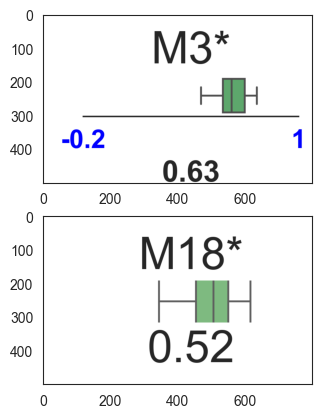

In [86]:
tmsfile = f'./interregionsets_scoreboxplot.png'
tms = imageio.imread(tmsfile)
tms = tms[303:-297,::,:]
sp = int(tms.shape[0]/h)
print(tms.shape[0]/h)
fig = plt.figure()
ax = fig.add_subplot(2,1,1)
ax.imshow(tms[sp*0:sp*1,:,:])
ax = fig.add_subplot(2,1,2)
ax.imshow(tms[sp*(h-1):sp*h,:,:])

In [104]:
tmsfile = f'./interregionsets_scoreboxplot.png'
tms = imageio.imread(tmsfile)
tms = tms[303:-297,::,:]
sp = int(tms.shape[0]/h)

s = 1
iax = 1
itms = 1
lpre = 'is'
total_img = []
for pre,intermodules in zip(['is','cs'],[is_interregionsets,cs_interregionsets]):
    for ir,smodule,scores,score in intermodules:      

        if pre!=lpre:
            vtk_img = 255*np.ones(vtk_img.shape)
            total_img = np.concatenate([total_img,vtk_img],axis=1).astype(np.uint8)
            iax += 1

        vtkfile = f'./interregionsets_{pre}_{ir}.jpeg'
        vtk = imageio.imread(vtkfile)
        vtk = np.rot90(vtk,3,(0,1))
        vtk = vtk[560:-560,240:-240,:]
        chan = 255*np.ones((vtk.shape[0],vtk.shape[1],1))
        vtk = np.concatenate([vtk,chan],axis=2)
        
        tmsfile_ = f'./interregionsets_{ir}_.png'
        tms_img = tms[sp*(itms-1):sp*itms,:,:]
        imageio.imwrite(tmsfile_,tms_img)
        pil = Image.open(tmsfile_)
        pil_new = pil.resize( (vtk.shape[1], int(tms_img.shape[0]*vtk.shape[1]/tms_img.shape[1]) ) )
        pil_new.save(tmsfile_)
        
        tms_img = imageio.imread(tmsfile_)
        print(tms_img.shape,vtk.shape)
        vtk_img = np.concatenate([tms_img,vtk],axis=0)
        print(iax,pre,ir,vtk_img.shape)
        if not len(total_img): 
            total_img = vtk_img.copy()
        else:
            total_img = np.concatenate([total_img,vtk_img],axis=1).astype(np.uint8)
            print(total_img.shape)   
        
        if iax%7==0:
            imageio.imwrite(f'./interregionsets_{s}.png',total_img)
            total_img = []
            s+=1
            print('save')
             
        iax += 1
        itms += 1
        lpre = pre  

if len(total_img):   
    imageio.imwrite(f'./interregionsets_{s}.png',total_img)    

C:\Users\user\AppData\Local\Temp\ipykernel_25860\1192533144.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  tms = imageio.imread(tmsfile)
C:\Users\user\AppData\Local\Temp\ipykernel_25860\1192533144.py:20: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  vtk = imageio.imread(vtkfile)
C:\Users\user\AppData\Local\Temp\ipykernel_25860\1192533144.py:33: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread`

(386, 618, 4) (812, 618, 4)
1 is 3 (1198, 618, 4)
(386, 618, 4) (812, 618, 4)
2 is 5 (1198, 618, 4)
(1198, 1236, 4)
(386, 618, 4) (812, 618, 4)
4 cs 1 (1198, 618, 4)
(1198, 2472, 4)
(386, 618, 4) (812, 618, 4)
5 cs 2 (1198, 618, 4)
(1198, 3090, 4)
(386, 618, 4) (812, 618, 4)
6 cs 4 (1198, 618, 4)
(1198, 3708, 4)
(386, 618, 4) (812, 618, 4)
7 cs 6 (1198, 618, 4)
(1198, 4326, 4)
save
(386, 618, 4) (812, 618, 4)
8 cs 7 (1198, 618, 4)
(386, 618, 4) (812, 618, 4)
9 cs 8 (1198, 618, 4)
(1198, 1236, 4)
(386, 618, 4) (812, 618, 4)
10 cs 9 (1198, 618, 4)
(1198, 1854, 4)
(386, 618, 4) (812, 618, 4)
11 cs 10 (1198, 618, 4)
(1198, 2472, 4)
(386, 618, 4) (812, 618, 4)
12 cs 11 (1198, 618, 4)
(1198, 3090, 4)
(386, 618, 4) (812, 618, 4)
13 cs 12 (1198, 618, 4)
(1198, 3708, 4)
(386, 618, 4) (812, 618, 4)
14 cs 13 (1198, 618, 4)
(1198, 4326, 4)
save
(386, 618, 4) (812, 618, 4)
15 cs 14 (1198, 618, 4)
(386, 618, 4) (812, 618, 4)
16 cs 15 (1198, 618, 4)
(1198, 1236, 4)
(386, 618, 4) (812, 618, 4)
17 cs 1

# save all module dict as pickle

In [93]:
import pickle
with open('./CA_module_dicts.pickle','wb') as f:
    pickle.dump(CA_module_dicts,f)
    
with open('./CA_module_dicts.pickle','rb') as f:
    test = pickle.load(f)
test

[{'module_class': 'CA',
  'module_name': 'CBN',
  'module_regions': ['IP', 'DN', 'FN', 'VeCB'],
  'module_corrs':             IP        DN        FN      VeCB
  IP    1.000000  0.764156  0.720808  0.759504
  DN    0.764156  1.000000  0.618271  0.596532
  FN    0.720808  0.618271  1.000000  0.714964
  VeCB  0.759504  0.596532  0.714964  1.000000,
  'module_consistency': 0.6957059171464053},
 {'module_class': 'CA',
  'module_name': 'CBX',
  'module_regions': ['LING',
   'CENT',
   'CUL',
   'DEC',
   'FOTU',
   'PYR',
   'UVU',
   'NOD',
   'SIM',
   'AN',
   'PRM',
   'COPY',
   'PFL',
   'FL'],
  'module_corrs':           LING      CENT       CUL       DEC      FOTU       PYR       UVU   
  LING  1.000000  0.630875  0.674046  0.707271  0.507049  0.633324  0.629050  \
  CENT  0.630875  1.000000  0.824701  0.708389  0.551084  0.696140  0.624740   
  CUL   0.674046  0.824701  1.000000  0.799780  0.650557  0.698240  0.672995   
  DEC   0.707271  0.708389  0.799780  1.000000  0.838444  0.83

In [94]:
import pickle
with open('./is_target_module_dicts.pickle','wb') as f:
    pickle.dump(is_target_module_dicts,f)
    
with open('./is_target_module_dicts.pickle','rb') as f:
    test = pickle.load(f)
test


[{'module_class': 'target',
  'module_name': 'TMv',
  'module_regions': ['PMv', 'TU', 'LM', 'MM', 'PMd'],
  'module_corrs': PMv    0.804368
  TU     0.579613
  LM     0.547307
  MM     0.547140
  PMd    0.540912
  Name: TMv, dtype: float64,
  'module_consistency': 0.6038678098027317},
 {'module_class': 'target',
  'module_name': 'PVpo',
  'module_regions': ['PVa',
   'PVi',
   'OV',
   'SBPV',
   'SCH',
   'AVPV',
   'MPN',
   'VMPO',
   'RCH'],
  'module_corrs': PVa     0.750903
  PVi     0.680780
  OV      0.644761
  SBPV    0.638937
  SCH     0.621152
  AVPV    0.605342
  MPN     0.589967
  VMPO    0.568002
  RCH     0.545545
  Name: PVpo, dtype: float64,
  'module_consistency': 0.6272654070876444},
 {'module_class': 'target',
  'module_name': 'SCH',
  'module_regions': ['RCH',
   'ARH',
   'SBPV',
   'PVpo',
   'MPN',
   'PVa',
   'PVi',
   'MPO',
   'AVPV',
   'DMH',
   'AVP',
   'VMPO',
   'AHN'],
  'module_corrs': RCH     0.722672
  ARH     0.660036
  SBPV    0.634128
  PVpo    

In [95]:
import pickle
with open('./cs_target_module_dicts.pickle','wb') as f:
    pickle.dump(cs_target_module_dicts,f)
    
with open('./cs_target_module_dicts.pickle','rb') as f:
    test = pickle.load(f)
test

[{'module_class': 'target',
  'module_name': 'IC',
  'module_regions': ['NB',
   'NLL',
   'CENT',
   'SCm',
   'CUL',
   'SIM',
   'POL',
   'NTB',
   'PoT',
   'SOC',
   'AN',
   'PG',
   'TRN',
   'PRM',
   'CUN'],
  'module_corrs': NB      0.690577
  NLL     0.666252
  CENT    0.641916
  SCm     0.592622
  CUL     0.590104
  SIM     0.582559
  POL     0.581696
  NTB     0.573369
  PoT     0.566095
  SOC     0.563469
  AN      0.530341
  PG      0.526489
  TRN     0.515989
  PRM     0.510087
  CUN     0.504449
  Name: IC, dtype: float64,
  'module_consistency': 0.5757343534662486},
 {'module_class': 'target',
  'module_name': 'PSV',
  'module_regions': ['SPVI',
   'SPVC',
   'SPVO',
   'MDRNd',
   'GRN',
   'V',
   'PARN',
   'MDRNv',
   'AMB',
   'LIN',
   'I5',
   'PGRNl',
   'IRN',
   'Acs5',
   'PC5',
   'P5',
   'SOC',
   'GR',
   'VCO',
   'XII',
   'NTB',
   'VII',
   'RO',
   'LRN',
   'NR',
   'NLL',
   'VI',
   'MARN',
   'CU',
   'x',
   'PRNc',
   'RM',
   'Pa5',
   'ACV

In [96]:
import pickle
with open('./initial_module_dicts.pickle','wb') as f:
    pickle.dump(initial_module_dicts,f)
    
with open('./initial_module_dicts.pickle','rb') as f:
    test = pickle.load(f)
test

[{'module_class': 'initial',
  'module_name': 'M1',
  'module_regions': ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'],
  'module_corrs':            NDB        PS       LPO       BST       ADP      VLPO       AVP   
  NDB   1.000000  0.523656  0.665656  0.543215  0.475063  0.594403  0.565126  \
  PS    0.523656  1.000000  0.664124  0.704505  0.675538  0.501621  0.620809   
  LPO   0.665656  0.664124  1.000000  0.724737  0.565172  0.543415  0.656724   
  BST   0.543215  0.704505  0.724737  1.000000  0.567879  0.443706  0.500767   
  ADP   0.475063  0.675538  0.565172  0.567879  1.000000  0.358948  0.508195   
  VLPO  0.594403  0.501621  0.543415  0.443706  0.358948  1.000000  0.603142   
  AVP   0.565126  0.620809  0.656724  0.500767  0.508195  0.603142  1.000000   
  MPO   0.640319  0.721717  0.720118  0.713328  0.644963  0.603496  0.826127   
  
             MPO  
  NDB   0.640319  
  PS    0.721717  
  LPO   0.720118  
  BST   0.713328  
  ADP   0.644963  
  VLPO  0.603496 

In [97]:
import pickle
with open('./tight_module_dicts.pickle','wb') as f:
    pickle.dump(tight_module_dicts,f)
    
with open('./tight_module_dicts.pickle','rb') as f:
    test = pickle.load(f)
test

[{'module_class': 'tight',
  'module_name': 'M1*',
  'module_regions': ['NDB', 'PS', 'LPO', 'BST', 'ADP', 'VLPO', 'AVP', 'MPO'],
  'module_corrs':            NDB        PS       LPO       BST       ADP      VLPO       AVP   
  NDB   1.000000  0.523656  0.665656  0.543215  0.475063  0.594403  0.565126  \
  PS    0.523656  1.000000  0.664124  0.704505  0.675538  0.501621  0.620809   
  LPO   0.665656  0.664124  1.000000  0.724737  0.565172  0.543415  0.656724   
  BST   0.543215  0.704505  0.724737  1.000000  0.567879  0.443706  0.500767   
  ADP   0.475063  0.675538  0.565172  0.567879  1.000000  0.358948  0.508195   
  VLPO  0.594403  0.501621  0.543415  0.443706  0.358948  1.000000  0.603142   
  AVP   0.565126  0.620809  0.656724  0.500767  0.508195  0.603142  1.000000   
  MPO   0.640319  0.721717  0.720118  0.713328  0.644963  0.603496  0.826127   
  
             MPO  
  NDB   0.640319  
  PS    0.721717  
  LPO   0.720118  
  BST   0.713328  
  ADP   0.644963  
  VLPO  0.603496  

In [105]:
[i for i in test if 'CP' in i['module_regions']]

[{'module_class': 'tight',
  'module_name': 'M14*',
  'module_regions': ['TRS',
   'LSc',
   'SF',
   'LA',
   'GPi',
   'CP',
   'GPe',
   'MEA',
   'OT',
   'AAA',
   'MA',
   'BLA',
   'EPv',
   'AON',
   'LSr',
   'IA',
   'ACB',
   'SI',
   'CEA',
   'FS'],
  'module_corrs':           TRS       LSc        SF        LA       GPi        CP       GPe   
  TRS  1.000000  0.490585  0.810899  0.424765  0.192191  0.193494  0.154200  \
  LSc  0.490585  1.000000  0.715384  0.306051  0.221222  0.312581  0.155037   
  SF   0.810899  0.715384  1.000000  0.420180  0.277754  0.255547  0.187301   
  LA   0.424765  0.306051  0.420180  1.000000  0.270685  0.479388  0.287868   
  GPi  0.192191  0.221222  0.277754  0.270685  1.000000  0.616177  0.731560   
  CP   0.193494  0.312581  0.255547  0.479388  0.616177  1.000000  0.734439   
  GPe  0.154200  0.155037  0.187301  0.287868  0.731560  0.734439  1.000000   
  MEA  0.006295  0.025485  0.195557  0.350823  0.293511  0.206366  0.197707   
  OT   0.1